<a href="https://colab.research.google.com/github/JOyongho4/DARTB4/blob/main/%ED%86%A0%EC%9D%B4%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A1%B0%EC%9A%A9%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 로드맵

문제정의:많은 한국인이 당뇨, 고지혈증, 고혈압을 앓고 있다.

지표결정: Korean Health Records

가설: 흡연의 기간이 질병 발병에 결정적인 원인을 제공할 것이다.

흡연 기간에 따른 당뇨병/고지혈증/고혈압 발병

In [184]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

plt.style.use('fivethirtyeight')
plt.ion()

import warnings

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [185]:
import requests
from io import BytesIO

# GitHub 파일의 raw URL
url = 'https://github.com/JOyongho4/DARTB4/raw/main/KoreanHealthRecords/Sorted_Merged_Data.xlsx'

# 엑셀 파일을 pandas 데이터프레임으로 읽기
df = pd.read_excel(url, sheet_name='Sheet1')
# 데이터프레임 출력
print(df)

            T00_ID T00_DATA_CLASS  T00_SEX  T01_EDU  T01_MARRY  T02_MARRY  \
0    K_FOLLOW_0001            F05        1        1          2      66666   
1    K_FOLLOW_0002            F19        1        3          2          2   
2    K_FOLLOW_0003            F05        1        2          2      66666   
3    K_FOLLOW_0004            F05        2        2          2      66666   
4    K_FOLLOW_0005            F19        1        3          2          2   
..             ...            ...      ...      ...        ...        ...   
832  K_FOLLOW_0996            F05        1        1          2      66666   
833  K_FOLLOW_0997            F18        1        3          2          2   
834  K_FOLLOW_0998            F19        1        5          2          2   
835  K_FOLLOW_0999            F11        2        1          2          2   
836  K_FOLLOW_1000            F19        2        2          2          2   

     T03_MARRY  T04_MARRY  T01_AGE  T02_AGE  ...  T03_WEIGHT  T04_WEIGHT  \

In [186]:
# 영어 컬럼명을 한국어로 변환하기 위한 매핑
columns_translation = {
    'T00_ID': 'ID',
    'T00_DATA_CLASS': '데이터_단위',
    'T00_SEX': '성별',
    'T01_EDU': '교육_수준_1차',
    'T01_MARRY': '결혼_상태_1차',
    'T02_MARRY': '결혼_상태_2차',
    'T03_MARRY': '결혼_상태_3차',
    'T04_MARRY': '결혼_상태_4차',
    'T01_AGE': '나이_1차',
    'T02_AGE': '나이_2차',
    'T03_AGE': '나이_3차',
    'T04_AGE': '나이_4차',
    'T01_EDATE': '설문_날짜_1차',
    'T02_EDATE': '설문_날짜_2차',
    'T03_EDATE': '설문_날짜_3차',
    'T04_EDATE': '설문_날짜_4차',
    'T01_ALT': 'ALT_1차',
    'T02_ALT': 'ALT_2차',
    'T03_ALT': 'ALT_3차',
    'T04_ALT': 'ALT_4차',
    'T01_AST': 'AST_1차',
    'T02_AST': 'AST_2차',
    'T03_AST': 'AST_3차',
    'T04_AST': 'AST_4차',
    'T01_BEERAM': '맥주_양_1차',
    'T02_BEERAM': '맥주_양_2차',
    'T03_BEERAM': '맥주_양_3차',
    'T04_BEERAM': '맥주_양_4차',
    'T01_BEERFQ': '맥주_빈도_1차',
    'T02_BEERFQ': '맥주_빈도_2차',
    'T03_BEERFQ': '맥주_빈도_3차',
    'T04_BEERFQ': '맥주_빈도_4차',
    'T01_PMYN_C': '폐경_여부_1차',
    'T01_PMAG_C': '폐경_나이_1차',
    'T02_PMYN_C': '폐경_여부_2차',
    'T02_PMAG_C': '폐경_나이_2차',
    'T03_PMYN_C': '폐경_여부_3차',
    'T03_PMAG_C': '폐경_나이_3차',
    'T04_PMYN_C': '폐경_여부_4차',
    'T04_PMAG_C': '폐경_나이_4차',
    'T01_CHILD': '출산_여부_1차',
    'T01_CREATININE': '크레아티닌_1차',
    'T02_CREATININE': '크레아티닌_2차',
    'T03_CREATININE': '크레아티닌_3차',
    'T04_CREATININE': '크레아티닌_4차',
    'T01_DBP': '이완기_혈압_1차',
    'T02_DBP': '이완기_혈압_2차',
    'T03_DBP': '이완기_혈압_3차',
    'T04_DBP': '이완기_혈압_4차',
    'T01_DM': '당뇨_1차',
    'T02_DM': '당뇨_2차',
    'T03_DM': '당뇨_3차',
    'T04_DM': '당뇨_4차',
    'T01_DMAG': '당뇨_진단_나이_1차',
    'T02_DMAG': '당뇨_진단_나이_2차',
    'T03_DMAG': '당뇨_진단_나이_3차',
    'T04_DMAG': '당뇨_진단_나이_4차',
    'T01_DRDU': '음주_기간_1차',
    'T01_DRINK': '음주_여부_1차',
    'T02_DRINK': '음주_여부_2차',
    'T03_DRINK': '음주_여부_3차',
    'T04_DRINK': '음주_여부_4차',
    'T01_EXER': '고강도_운동_여부_1차',
    'T02_EXER': '고강도_운동_여부_2차',
    'T03_EXER': '고강도_운동_여부_3차',
    'T04_EXER': '고강도_운동_여부_4차',
    'T01_FLABAG': '첫_출산_나이_1차',
    'T01_FMFDM': '부모_당뇨_아버지_1차',
    'T02_FMFDM': '부모_당뇨_아버지_2차',
    'T03_FMFDM': '부모_당뇨_아버지_3차',
    'T04_FMFDM': '부모_당뇨_아버지_4차',
    'T01_FMFDMAG': '아버지_당뇨_진단_나이_1차',
    'T02_FMFDMAG': '아버지_당뇨_진단_나이_2차',
    'T03_FMFDMAG': '아버지_당뇨_진단_나이_3차',
    'T04_FMFDMAG': '아버지_당뇨_진단_나이_4차',
    'T01_FMFHT': '부모_고혈압_아버지_1차',
    'T02_FMFHT': '부모_고혈압_아버지_2차',
    'T03_FMFHT': '부모_고혈압_아버지_3차',
    'T04_FMFHT': '부모_고혈압_아버지_4차',
    'T01_FMFHTAG': '아버지_고혈압_진단_나이_1차',
    'T02_FMFHTAG': '아버지_고혈압_진단_나이_2차',
    'T03_FMFHTAG': '아버지_고혈압_진단_나이_3차',
    'T04_FMFHTAG': '아버지_고혈압_진단_나이_4차',
    'T01_FMMDM': '부모_당뇨_어머니_1차',
    'T02_FMMDM': '부모_당뇨_어머니_2차',
    'T03_FMMDM': '부모_당뇨_어머니_3차',
    'T04_FMMDM': '부모_당뇨_어머니_4차',
    'T01_FMMDMAG': '어머니_당뇨_진단_나이_1차',
    'T02_FMMDMAG': '어머니_당뇨_진단_나이_2차',
    'T03_FMMDMAG': '어머니_당뇨_진단_나이_3차',
    'T04_FMMDMAG': '어머니_당뇨_진단_나이_4차',
    'T01_FMMHT': '부모_고혈압_어머니_1차',
    'T02_FMMHT': '부모_고혈압_어머니_2차',
    'T03_FMMHT': '부모_고혈압_어머니_3차',
    'T04_FMMHT': '부모_고혈압_어머니_4차',
    'T01_FMMHTAG': '어머니_고혈압_진단_나이_1차',
    'T02_FMMHTAG': '어머니_고혈압_진단_나이_2차',
    'T03_FMMHTAG': '어머니_고혈압_진단_나이_3차',
    'T04_FMMHTAG': '어머니_고혈압_진단_나이_4차',
    'T01_FPREGAG': '첫_임신_나이_1차',
    'T01_GLU0': '공복_혈당_1차',
    'T02_GLU0': '공복_혈당_2차',
    'T03_GLU0': '공복_혈당_3차',
    'T04_GLU0': '공복_혈당_4차',
    'T01_HBA1C': 'HbA1C_1차',
    'T02_HBA1C': 'HbA1C_2차',
    'T03_HBA1C': 'HbA1C_3차',
    'T04_HBA1C': 'HbA1C_4차',
    'T01_HDL': 'HDL_콜레스테롤_1차',
    'T02_HDL': 'HDL_콜레스테롤_2차',
    'T03_HDL': 'HDL_콜레스테롤_3차',
    'T04_HDL': 'HDL_콜레스테롤_4차',
    'T01_HEIGHT': '신장_1차',
    'T02_HEIGHT': '신장_2차',
    'T03_HEIGHT': '신장_3차',
    'T04_HEIGHT': '신장_4차',
    'T01_HIP': '엉덩이둘레_1차',
    'T02_HIP': '엉덩이둘레_2차',
    'T03_HIP': '엉덩이둘레_3차',
    'T04_HIP': '엉덩이둘레_4차',
    'T01_HLIQAM': '증류주_양_1차',
    'T02_HLIQAM': '증류주_양_2차',
    'T03_HLIQAM': '증류주_양_3차',
    'T04_HLIQAM': '증류주_양_4차',
    'T01_HLIQFQ': '증류주_빈도_1차',
    'T02_HLIQFQ': '증류주_빈도_2차',
    'T03_HLIQFQ': '증류주_빈도_3차',
    'T04_HLIQFQ': '증류주_빈도_4차',
    'T01_HTN': '고혈압_1차',
    'T02_HTN': '고혈압_2차',
    'T03_HTN': '고혈압_3차',
    'T04_HTN': '고혈압_4차',
    'T01_HTNAG': '고혈압_진단_나이_1차',
    'T02_HTNAG': '고혈압_진단_나이_2차',
    'T03_HTNAG': '고혈압_진단_나이_3차',
    'T04_HTNAG': '고혈압_진단_나이_4차',
    'T01_INS0': '공복_인슐린_1차',
    'T02_INS0': '공복_인슐린_2차',
    'T03_INS0': '공복_인슐린_3차',
    'T04_INS0': '공복_인슐린_4차',
    'T01_LIP': '고지혈증_1차',
    'T02_LIP': '고지혈증_2차',
    'T03_LIP': '고지혈증_3차',
    'T04_LIP': '고지혈증_4차',
    'T01_LIPAG': '고지혈증_진단_나이_1차',
    'T02_LIPAG': '고지혈증_진단_나이_2차',
    'T03_LIPAG': '고지혈증_진단_나이_3차',
    'T04_LIPAG': '고지혈증_진단_나이_4차',
    'T01_MNSAG': '초경_나이_1차',
    'T01_PREG': '임신_경험_1차',
    'T01_PSM': '간접흡연_여부_1차',
    'T02_PSM': '간접흡연_여부_2차',
    'T03_PSM': '간접흡연_여부_3차',
    'T04_PSM': '간접흡연_여부_4차',
    'T01_PULSE': '심박수_1차',
    'T02_PULSE': '심박수_2차',
    'T03_PULSE': '심박수_3차',
    'T04_PULSE': '심박수_4차',
    'T01_RICEAM': '사케_양_1차',
    'T02_RICEAM': '사케_양_2차',
    'T03_RICEAM': '사케_양_3차',
    'T04_RICEAM': '사케_양_4차',
    'T01_RICEFQ': '사케_빈도_1차',
    'T02_RICEFQ': '사케_빈도_2차',
    'T03_RICEFQ': '사케_빈도_3차',
    'T04_RICEFQ': '사케_빈도_4차',
    'T01_SBP': '수축기_혈압_1차',
    'T02_SBP': '수축기_혈압_2차',
    'T03_SBP': '수축기_혈압_3차',
    'T04_SBP': '수축기_혈압_4차',
    'T01_SMAG': '흡연_시작_나이_1차',
    'T01_SMAM': '하루_흡연량_1차',
    'T02_SMAM': '하루_흡연량_2차',
    'T03_SMAM': '하루_흡연량_3차',
    'T04_SMAM': '하루_흡연량_4차',
    'T01_SMDU': '총_흡연_기간_1차',
    'T02_SMDU': '총_흡연_기간_2차',
    'T03_SMDU': '총_흡연_기간_3차',
    'T04_SMDU': '총_흡연_기간_4차',
    'T01_SMOKE': '흡연_상태_1차',
    'T02_SMOKE': '흡연_상태_2차',
    'T03_SMOKE': '흡연_상태_3차',
    'T04_SMOKE': '흡연_상태_4차',
    'T01_SOJUAM': '소주_양_1차',
    'T02_SOJUAM': '소주_양_2차',
    'T03_SOJUAM': '소주_양_3차',
    'T04_SOJUAM': '소주_양_4차',
    'T01_SOJUFQ': '소주_빈도_1차',
    'T02_SOJUFQ': '소주_빈도_2차',
    'T03_SOJUFQ': '소주_빈도_3차',
    'T04_SOJUFQ': '소주_빈도_4차',
    'T01_TAKAM': '막걸리_양_1차',
    'T02_TAKAM': '막걸리_양_2차',
    'T03_TAKAM': '막걸리_양_3차',
    'T04_TAKAM': '막걸리_양_4차',
    'T01_TAKFQ': '막걸리_빈도_1차',
    'T02_TAKFQ': '막걸리_빈도_2차',
    'T03_TAKFQ': '막걸리_빈도_3차',
    'T04_TAKFQ': '막걸리_빈도_4차',
    'T01_TCHL': '총_콜레스테롤_1차',
    'T02_TCHL': '총_콜레스테롤_2차',
    'T03_TCHL': '총_콜레스테롤_3차',
    'T04_TCHL': '총_콜레스테롤_4차',
    'T01_TG': '중성지방_1차',
    'T02_TG': '중성지방_2차',
    'T03_TG': '중성지방_3차',
    'T04_TG': '중성지방_4차',
    'T01_WAIST': '허리둘레_1차',
    'T02_WAIST': '허리둘레_2차',
    'T03_WAIST': '허리둘레_3차',
    'T04_WAIST': '허리둘레_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WINEAM': '와인_양_1차',
    'T02_WINEAM': '와인_양_2차',
    'T03_WINEAM': '와인_양_3차',
    'T04_WINEAM': '와인_양_4차',
    'T01_WINEFQ': '와인_빈도_1차',
    'T02_WINEFQ': '와인_빈도_2차',
    'T03_WINEFQ': '와인_빈도_3차',
    'T04_WINEFQ': '와인_빈도_4차'
}

# 컬럼명을 한국어로 변환
df.rename(columns=columns_translation, inplace=True)

# 변환된 컬럼명을 확인하기 위해 데이터프레임의 앞부분을 출력
df.head()

,ID,데이터_단위,성별,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,나이_1차,나이_2차,...,체중_3차,체중_4차,와인_양_1차,와인_양_2차,와인_양_3차,와인_양_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,K_FOLLOW_0001,F05,1,1,2,66666,2,2,56,58,...,51,52,77777.0,77777.0,77777.0,77777.0,0,0,0,0
1,K_FOLLOW_0002,F19,1,3,2,2,2,2,40,41,...,90,93,77777.0,77777.0,77777.0,77777.0,0,0,0,0
2,K_FOLLOW_0003,F05,1,2,2,66666,2,2,52,54,...,67,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0
3,K_FOLLOW_0004,F05,2,2,2,66666,2,3,60,62,...,71,70,77777.0,77777.0,77777.0,77777.0,0,0,0,0
4,K_FOLLOW_0005,F19,1,3,2,2,2,2,49,51,...,65,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0


# 가설

흡연 기간은 질병 발병에 중요한 역할을 할것이다

흡연량은 질병 발병에 중요한 역할을 할것이다

흡연관련 칼럼:

    '간접흡연_여부_1차'
    '간접흡연_여부_2차'
    '간접흡연_여부_3차'
    '간접흡연_여부_4차'

    '흡연_시작_나이_1차'

    '하루_흡연량_1차'
    '하루_흡연량_2차'
    '하루_흡연량_3차'
    '하루_흡연량_4차'

    '총_흡연_기간_1차'
    '총_흡연_기간_2차'
    '총_흡연_기간_3차',
    '총_흡연_기간_4차'

    '흡연_상태_1차'
    '흡연_상태_2차'
    '흡연_상태_3차'
    '흡연_상태_4차'

질병관련 칼럼:

    '당뇨_1차'
    '당뇨_2차'
    '당뇨_3차'
    '당뇨_4차'

    '당뇨_진단_나이_1차'
    '당뇨_진단_나이_2차'
    '당뇨_진단_나이_3차'
    '당뇨_진단_나이_4차'

    '고혈압_1차'
    '고혈압_2차'
    '고혈압_3차'
    '고혈압_4차'

    '고지혈증_1차'
    '고지혈증_2차'
    '고지혈증_3차'
    '고지혈증_4차'

In [187]:
# 결측치로 변환
# 77777은 헤당없음 -> 즉 0, 나머지는 결측치
df.replace(66666, np.nan, inplace=True)
df.replace(77777, 0, inplace=True)
df.replace(99999, np.nan, inplace=True)

In [188]:
df2 = df[['간접흡연_여부_1차',
'간접흡연_여부_2차',
'간접흡연_여부_3차',
'간접흡연_여부_4차',
'흡연_시작_나이_1차',
'하루_흡연량_1차',
'하루_흡연량_2차',
'하루_흡연량_3차',
'하루_흡연량_4차',
'총_흡연_기간_1차',
'총_흡연_기간_2차',
'총_흡연_기간_3차',
'총_흡연_기간_4차',
'흡연_상태_1차',
'흡연_상태_2차',
'흡연_상태_3차',
'흡연_상태_4차',
'당뇨_1차',
'당뇨_2차',
'당뇨_3차',
'당뇨_4차',
'당뇨_진단_나이_1차',
'당뇨_진단_나이_2차',
'당뇨_진단_나이_3차',
'당뇨_진단_나이_4차',
'고혈압_1차',
'고혈압_2차',
'고혈압_3차',
'고혈압_4차',
'고혈압_진단_나이_1차',
'고혈압_진단_나이_2차',
'고혈압_진단_나이_3차',
'고혈압_진단_나이_4차',
'고지혈증_1차',
'고지혈증_2차',
'고지혈증_3차',
'고지혈증_4차',
'고지혈증_진단_나이_1차',
'고지혈증_진단_나이_2차',
'고지혈증_진단_나이_3차',
'고지혈증_진단_나이_4차',
]]
df2.head()

,간접흡연_여부_1차,간접흡연_여부_2차,간접흡연_여부_3차,간접흡연_여부_4차,흡연_시작_나이_1차,하루_흡연량_1차,하루_흡연량_2차,하루_흡연량_3차,하루_흡연량_4차,총_흡연_기간_1차,...,고혈압_진단_나이_3차,고혈압_진단_나이_4차,고지혈증_1차,고지혈증_2차,고지혈증_3차,고지혈증_4차,고지혈증_진단_나이_1차,고지혈증_진단_나이_2차,고지혈증_진단_나이_3차,고지혈증_진단_나이_4차
0,2.0,NaN,2.0,1.0,20.0,20.0,10.0,10.0,10.0,40.0,...,0.0,0.0,1,1,1,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,2.0,1.0,20.0,40.0,20.0,20.0,20.0,20.0,...,0.0,0.0,1,1,1,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,21.0,20.0,20.0,20.0,20.0,15.0,...,0.0,0.0,1,1,1,1.0,0.0,0.0,0.0,0.0
3,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,1,1,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,2.0,23.0,20.0,30.0,20.0,20.0,20.0,...,0.0,0.0,1,1,1,1.0,0.0,0.0,0.0,0.0


# 결측치

결측치 확인

In [189]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')


#Plots
import missingno as msno
from sklearn.pipeline import make_pipeline
import plotly.graph_objs as go
import plotly.offline as py

def missing_plot(df, name):
    null_feat = pd.DataFrame(len(df) - df.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((df.isnull().sum() / len(df)) * 100, columns=['Percentage'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x=null_feat.index, y=null_feat['Count'], opacity=0.8, text=percentage_null['Percentage'],
                   textposition='auto', marker=dict(color='#7EC0EE', line=dict(color='#000000', width=1.5)))

    layout = dict(title=name)

    fig = dict(data=[trace], layout=layout)
    py.iplot(fig)

# 전체 데이터프레임의 결측치 시각화
missing_plot(df, 'Missing Values (count & %)')


In [190]:
missing_plot(df2, 'Missing Values (count & %)')

In [191]:
# 간접흡연 결측치 처리
# 간접흡연 1,2 개수 카운트

a=0
b=0
for i in df2[['간접흡연_여부_1차','간접흡연_여부_2차','간접흡연_여부_3차','간접흡연_여부_4차']]:
  a += (df2[i] == 1).sum()
  b += (df2[i] == 2).sum()
print('1 = ',a,'2 = ',b)


1 =  2036 2 =  999


In [192]:
# 간접흡연은 1로 결측치 처리

df2['간접흡연_여부_1차'].fillna(1, inplace=True)
df2['간접흡연_여부_2차'].fillna(1, inplace=True)
df2['간접흡연_여부_3차'].fillna(1, inplace=True)
df2['간접흡연_여부_4차'].fillna(1, inplace=True)

In [193]:
# 흡연시작나이 결측치 처리
# 흡연시작나이=0인 값을 제외한 중앙값으로 결측치 처리 (20)

median_excluding_zeros = df2[df2['흡연_시작_나이_1차'] != 0]['흡연_시작_나이_1차'].median()
round(median_excluding_zeros,1)
df2['흡연_시작_나이_1차'].fillna(median_excluding_zeros, inplace=True)

In [194]:
# 하루 흡연량 결측치 처리
# 하루 흡연량=0인 값을 제외한 평균으로 결측치 처리

m1=df2[df2['하루_흡연량_1차']!=0]['하루_흡연량_1차'].mean()
m2=df2[df2['하루_흡연량_2차']!=0]['하루_흡연량_2차'].mean()
m3=df2[df2['하루_흡연량_3차']!=0]['하루_흡연량_3차'].mean()
m4=df2[df2['하루_흡연량_4차']!=0]['하루_흡연량_4차'].mean()

M=(m1+m2+m3+m4)/4
M=round(M,1)

df2['하루_흡연량_1차'].fillna(M, inplace=True)
df2['하루_흡연량_2차'].fillna(M, inplace=True)
df2['하루_흡연량_3차'].fillna(M, inplace=True)
df2['하루_흡연량_4차'].fillna(M, inplace=True)

In [195]:
# 총 흡연기간 결측치 처리
# 총 흡연기간=0인 값을 제외한 평균으로 결측치 처리

d1=df2[df2['총_흡연_기간_1차']!=0]['총_흡연_기간_1차'].mean()
d1=round(d1,1)

d2=df2[df2['총_흡연_기간_2차']!=0]['총_흡연_기간_2차'].mean()
d2=round(d2,1)

d3=df2[df2['총_흡연_기간_3차']!=0]['총_흡연_기간_3차'].mean()
d3=round(d3,1)

d4=df2[df2['총_흡연_기간_4차']!=0]['총_흡연_기간_4차'].mean()
d4=round(d4,1)

df2['총_흡연_기간_1차'].fillna(d1, inplace=True)
df2['총_흡연_기간_2차'].fillna(d2, inplace=True)
df2['총_흡연_기간_3차'].fillna(d3, inplace=True)
df2['총_흡연_기간_4차'].fillna(d4, inplace=True)
print(d1,d2,d3,d4)

24.6 21.4 24.3 25.6


In [196]:
# 흡연상태 1,2,3 개수 카운트

a=0
b=0
c=0
for i in df2[['흡연_상태_1차','흡연_상태_2차','흡연_상태_3차','흡연_상태_4차']]:
  a += (df2[i] == 1).sum()
  b += (df2[i] == 2).sum()
  c += (df2[i] == 3).sum()
print('1 = ',a,'2 = ',b,'3 = ',c)

1 =  2293 2 =  505 3 =  539


In [197]:
# 흡연상태 결측치 1로 처리

df2['흡연_상태_1차'].fillna(1, inplace=True)
df2['흡연_상태_2차'].fillna(1, inplace=True)
df2['흡연_상태_3차'].fillna(1, inplace=True)
df2['흡연_상태_4차'].fillna(1, inplace=True)

In [198]:
# 당뇨 1,2 개수 카운트

a=0
b=0
for i in df2[['당뇨_1차','당뇨_2차','당뇨_3차','당뇨_4차']]:
  a += (df2[i] == 1).sum()
  b += (df2[i] == 2).sum()

print('1 = ',a,'2 = ',b)

1 =  3226 2 =  118


In [199]:
# 당뇨 결측치 1로 처리

df2['당뇨_1차'].fillna(1, inplace=True)
df2['당뇨_2차'].fillna(1, inplace=True)
df2['당뇨_3차'].fillna(1, inplace=True)
df2['당뇨_4차'].fillna(1, inplace=True)

In [200]:
# 당뇨진단나이 결측치 처리
# 당뇨진단나이는 1,2,3,4차의 값이 동일해야함
# 당뇨진단나이 1차의 값으로 나머지 결측치를 동일한 값으로 처리

df2['당뇨_진단_나이_2차'].fillna(df2['당뇨_진단_나이_1차'], inplace=True)
df2['당뇨_진단_나이_3차'].fillna(df2['당뇨_진단_나이_1차'], inplace=True)
df2['당뇨_진단_나이_4차'].fillna(df2['당뇨_진단_나이_1차'], inplace=True)

In [201]:
# 고혈압 결측치 처리
# 고혈압 1,2 개수 카운트

a=0
b=0
for i in df2[['고혈압_1차','고혈압_2차','고혈압_3차','고혈압_4차']]:
  a += (df2[i] == 1).sum()
  b += (df2[i] == 2).sum()
print('1 = ',a,'2 = ',b)


1 =  3031 2 =  313


In [202]:
# 고혈압 결측치 1로 처리

df2['고혈압_4차'].fillna(1, inplace=True)

In [203]:
# 고지혈증 결측치 처리
# 고지혈증 1,2 개수 카운트

a=0
b=0
for i in df2[['고지혈증_1차','고지혈증_2차','고지혈증_3차','고지혈증_4차']]:
  a += (df2[i] == 1).sum()
  b += (df2[i] == 2).sum()
print('1 = ',a,'2 = ',b)

1 =  3217 2 =  127


In [204]:
# 고지혈증 결측치 1로 처리

df2['고지혈증_4차'].fillna(1, inplace=True)

In [205]:
# 고혈압진단나이 결측치 처리
# 고혈압진단나이는 1,2,3,4차의 값이 동일해야함
# 고혈압진단나이 1차의 값으로 나머지 결측치를 동일한 값으로 처리

df2['고혈압_진단_나이_1차'].fillna(df2['고혈압_진단_나이_1차'].mean(), inplace=True)
df2['고혈압_진단_나이_2차'].fillna(df2['고혈압_진단_나이_1차'], inplace=True)
df2['고혈압_진단_나이_3차'].fillna(df2['고혈압_진단_나이_1차'], inplace=True)
df2['고혈압_진단_나이_4차'].fillna(df2['고혈압_진단_나이_1차'], inplace=True)

In [206]:
# 고지혈증진단나이 결측치 처리
# 고지혈증진단나이는 1,2,3,4차의 값이 동일해야함
# 고지혈증진단나이 1차의 값으로 나머지 결측치를 동일한 값으로 처리

df2['고지혈증_진단_나이_1차'].fillna(df2['고지혈증_진단_나이_1차'].mean(), inplace=True)
df2['고지혈증_진단_나이_2차'].fillna(df2['고지혈증_진단_나이_1차'], inplace=True)
df2['고지혈증_진단_나이_3차'].fillna(df2['고지혈증_진단_나이_1차'], inplace=True)
df2['고지혈증_진단_나이_4차'].fillna(df2['고지혈증_진단_나이_1차'], inplace=True)

In [207]:
missing_plot(df2, 'Missing Values (count & %)')

# 이상치
이상치 여부 확인

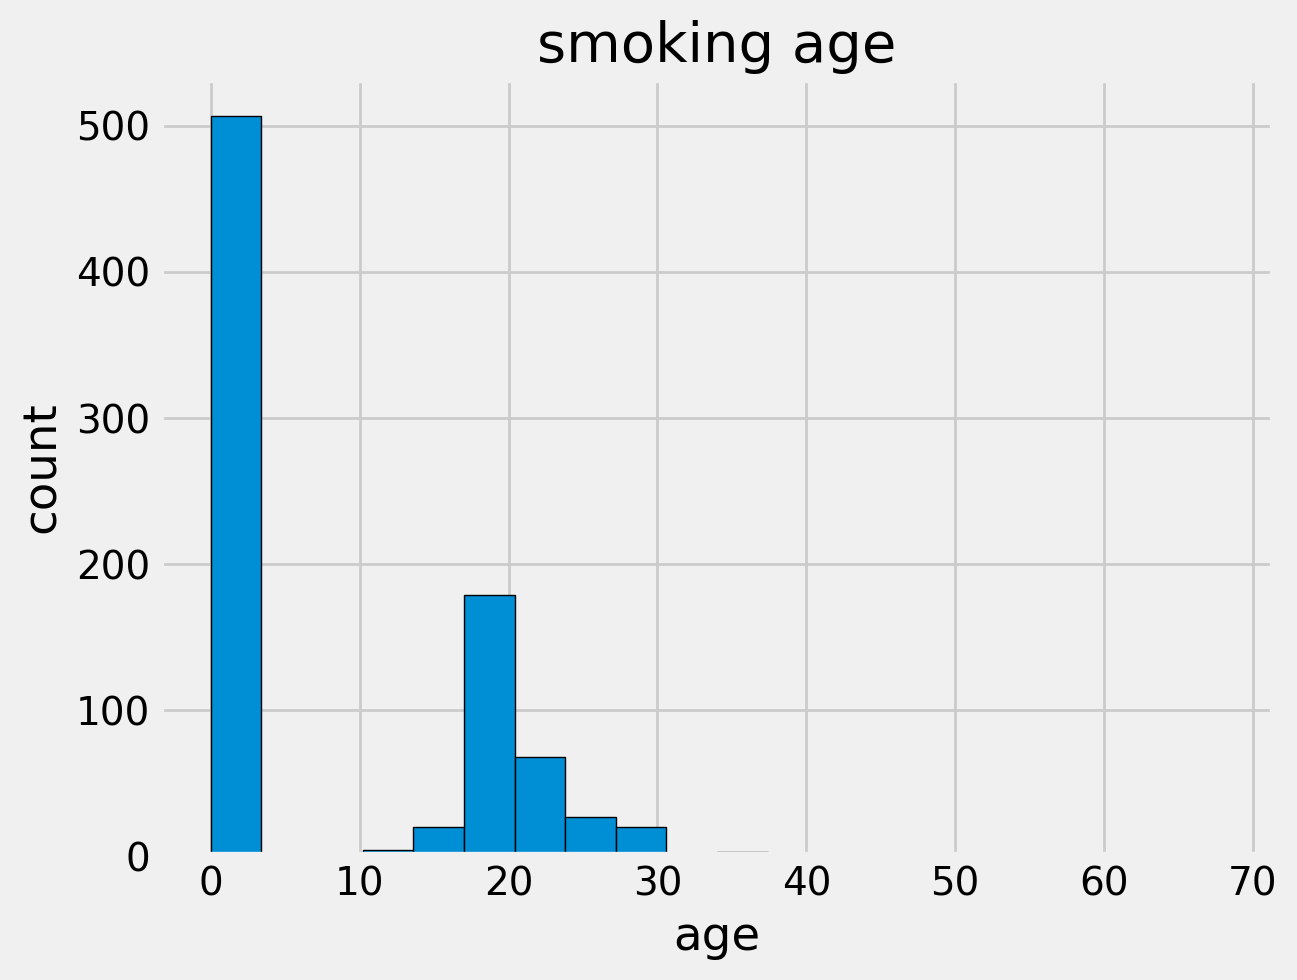

In [208]:
# '흡연시작나이' 컬럼으로 히스토그램 그리기
plt.hist(df2['흡연_시작_나이_1차'], bins=20, edgecolor='black')

# 그래프 제목 및 축 레이블 추가
plt.title('smoking age')
plt.xlabel('age')
plt.ylabel('count')

# 그래프 표시
plt.show()

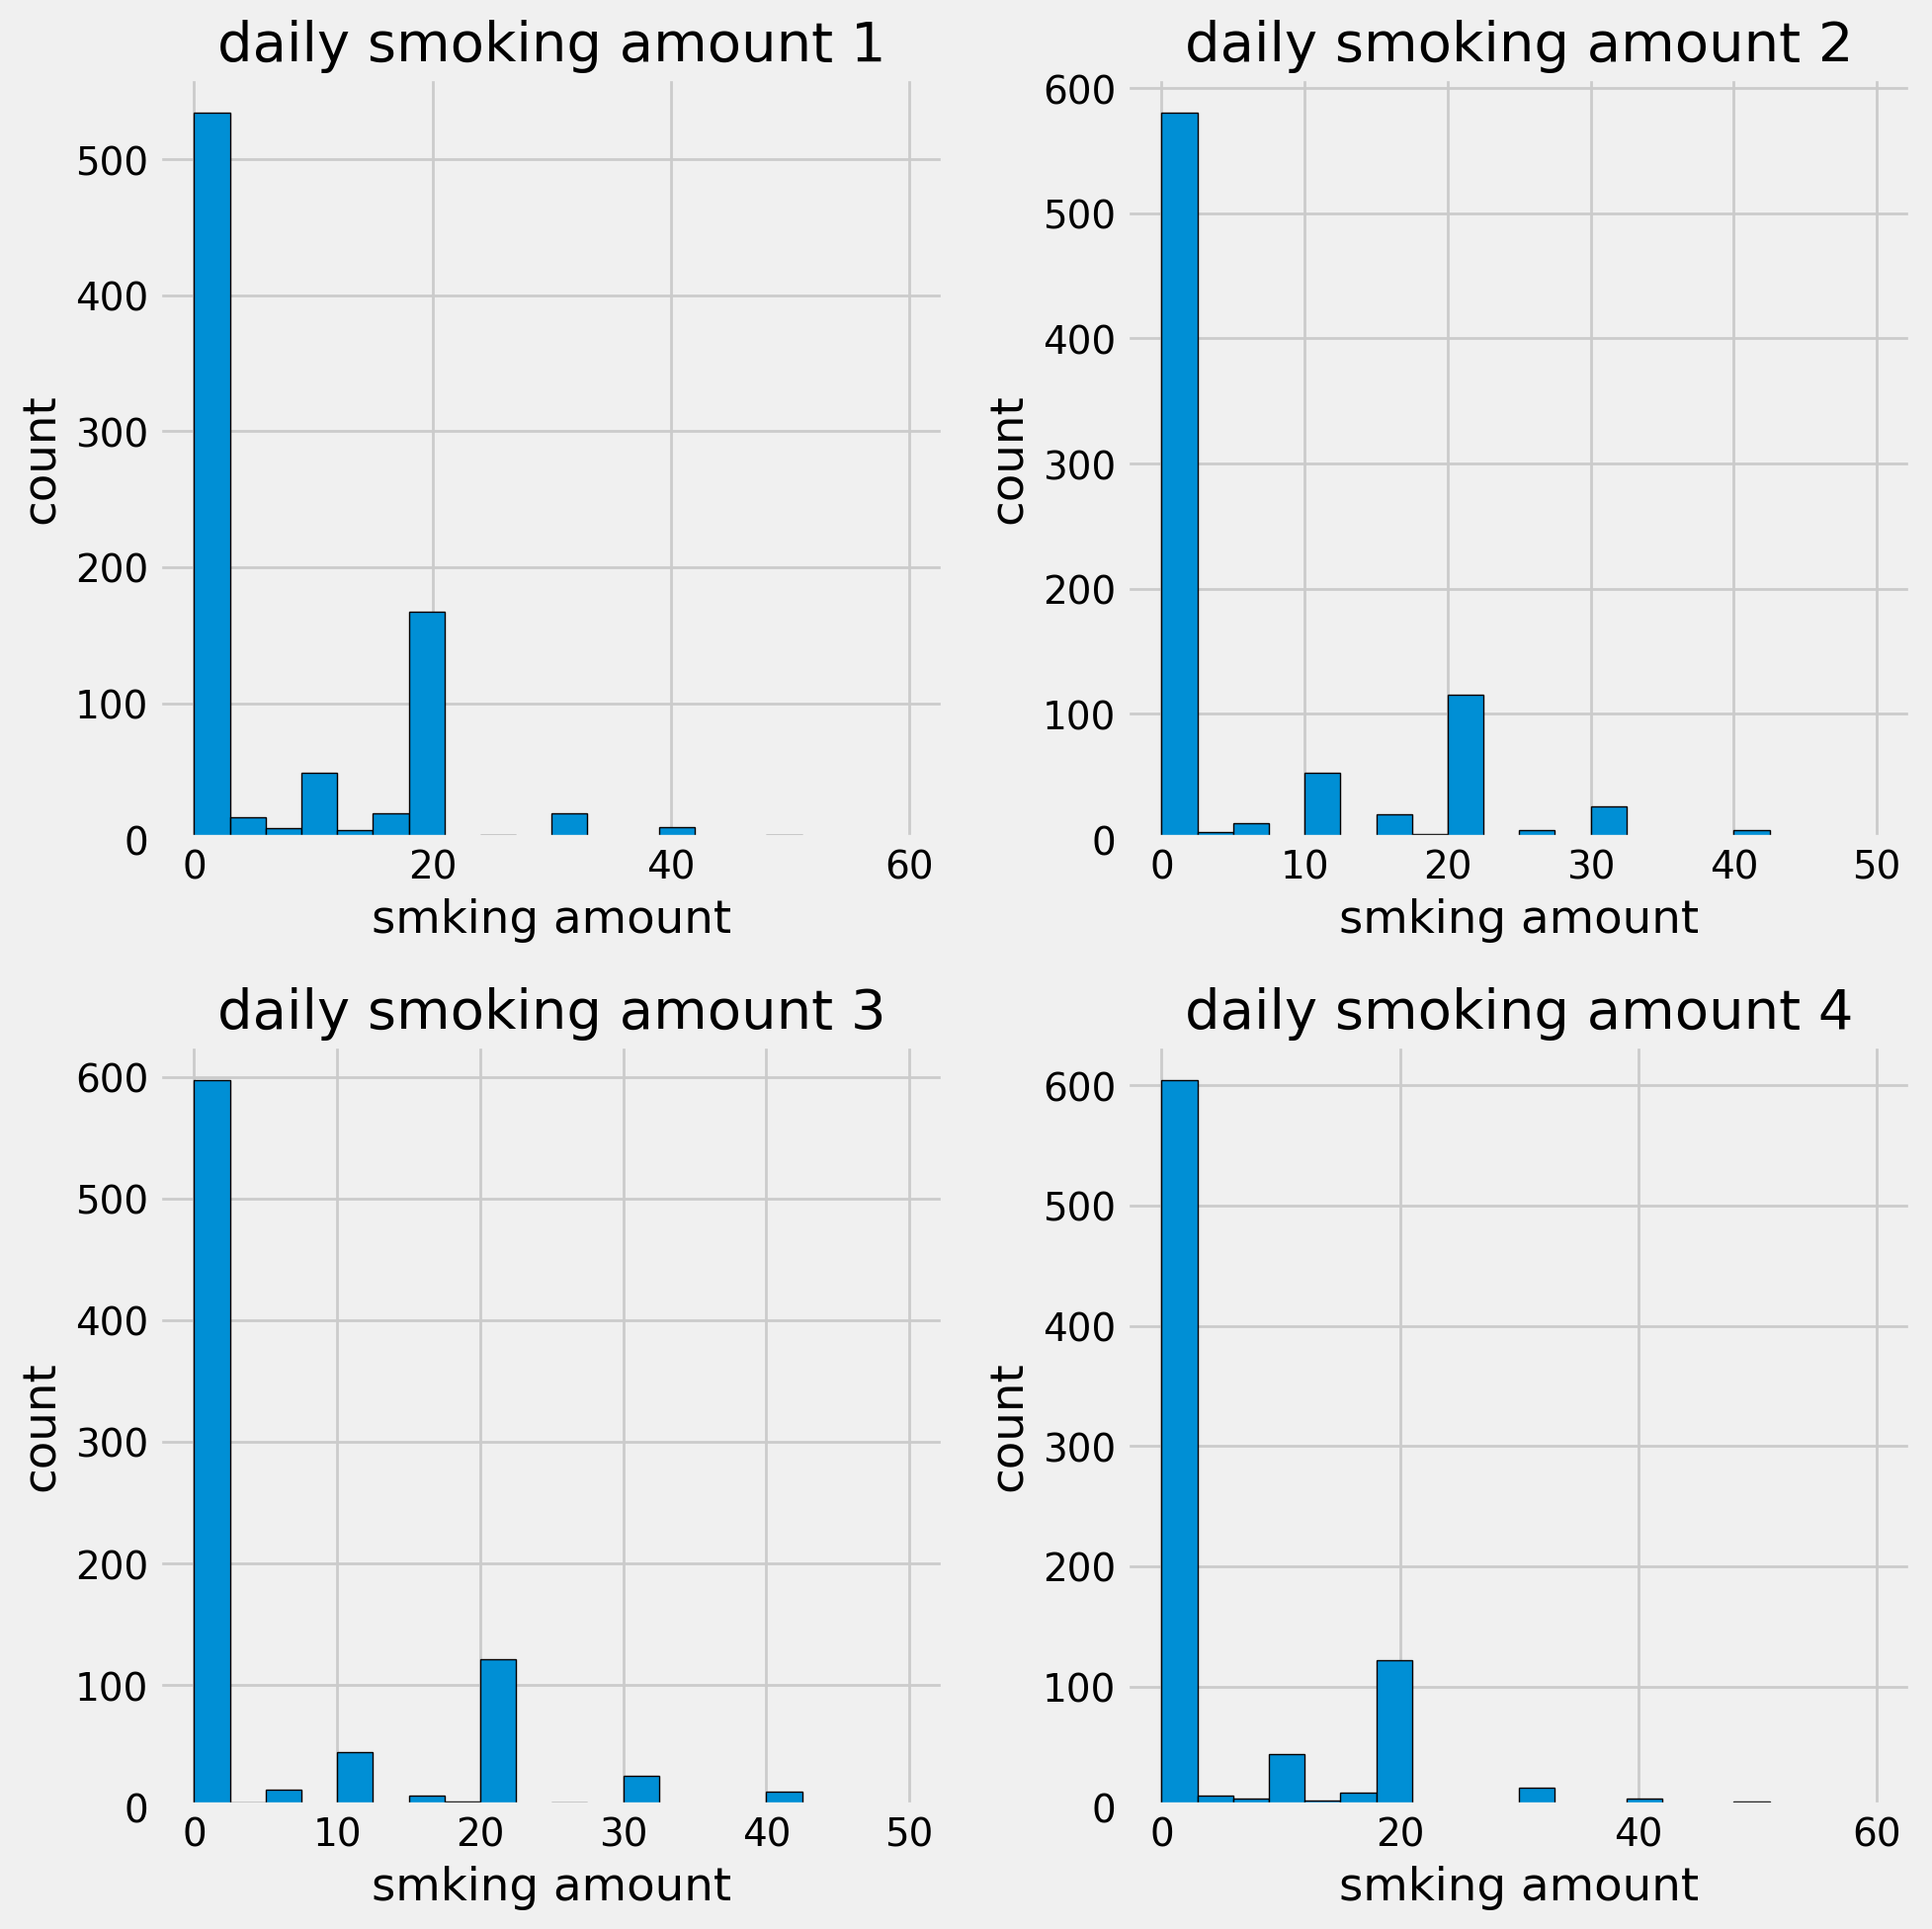

In [209]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# '하루 흡연량' 컬럼으로 히스토그램 그리기
axes[0,0].hist(df2['하루_흡연량_1차'], bins=20, edgecolor='black')
axes[0,0].set_title('daily smoking amount 1')
axes[0,0].set_xlabel('smking amount')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df2['하루_흡연량_2차'], bins=20, edgecolor='black')
axes[0,1].set_title('daily smoking amount 2')
axes[0,1].set_xlabel('smking amount')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df2['하루_흡연량_3차'], bins=20, edgecolor='black')
axes[1,0].set_title('daily smoking amount 3')
axes[1,0].set_xlabel('smking amount')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df2['하루_흡연량_4차'], bins=20, edgecolor='black')
axes[1,1].set_title('daily smoking amount 4')
axes[1,1].set_xlabel('smking amount')
axes[1,1].set_ylabel('count')


# 그래프들 사이 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

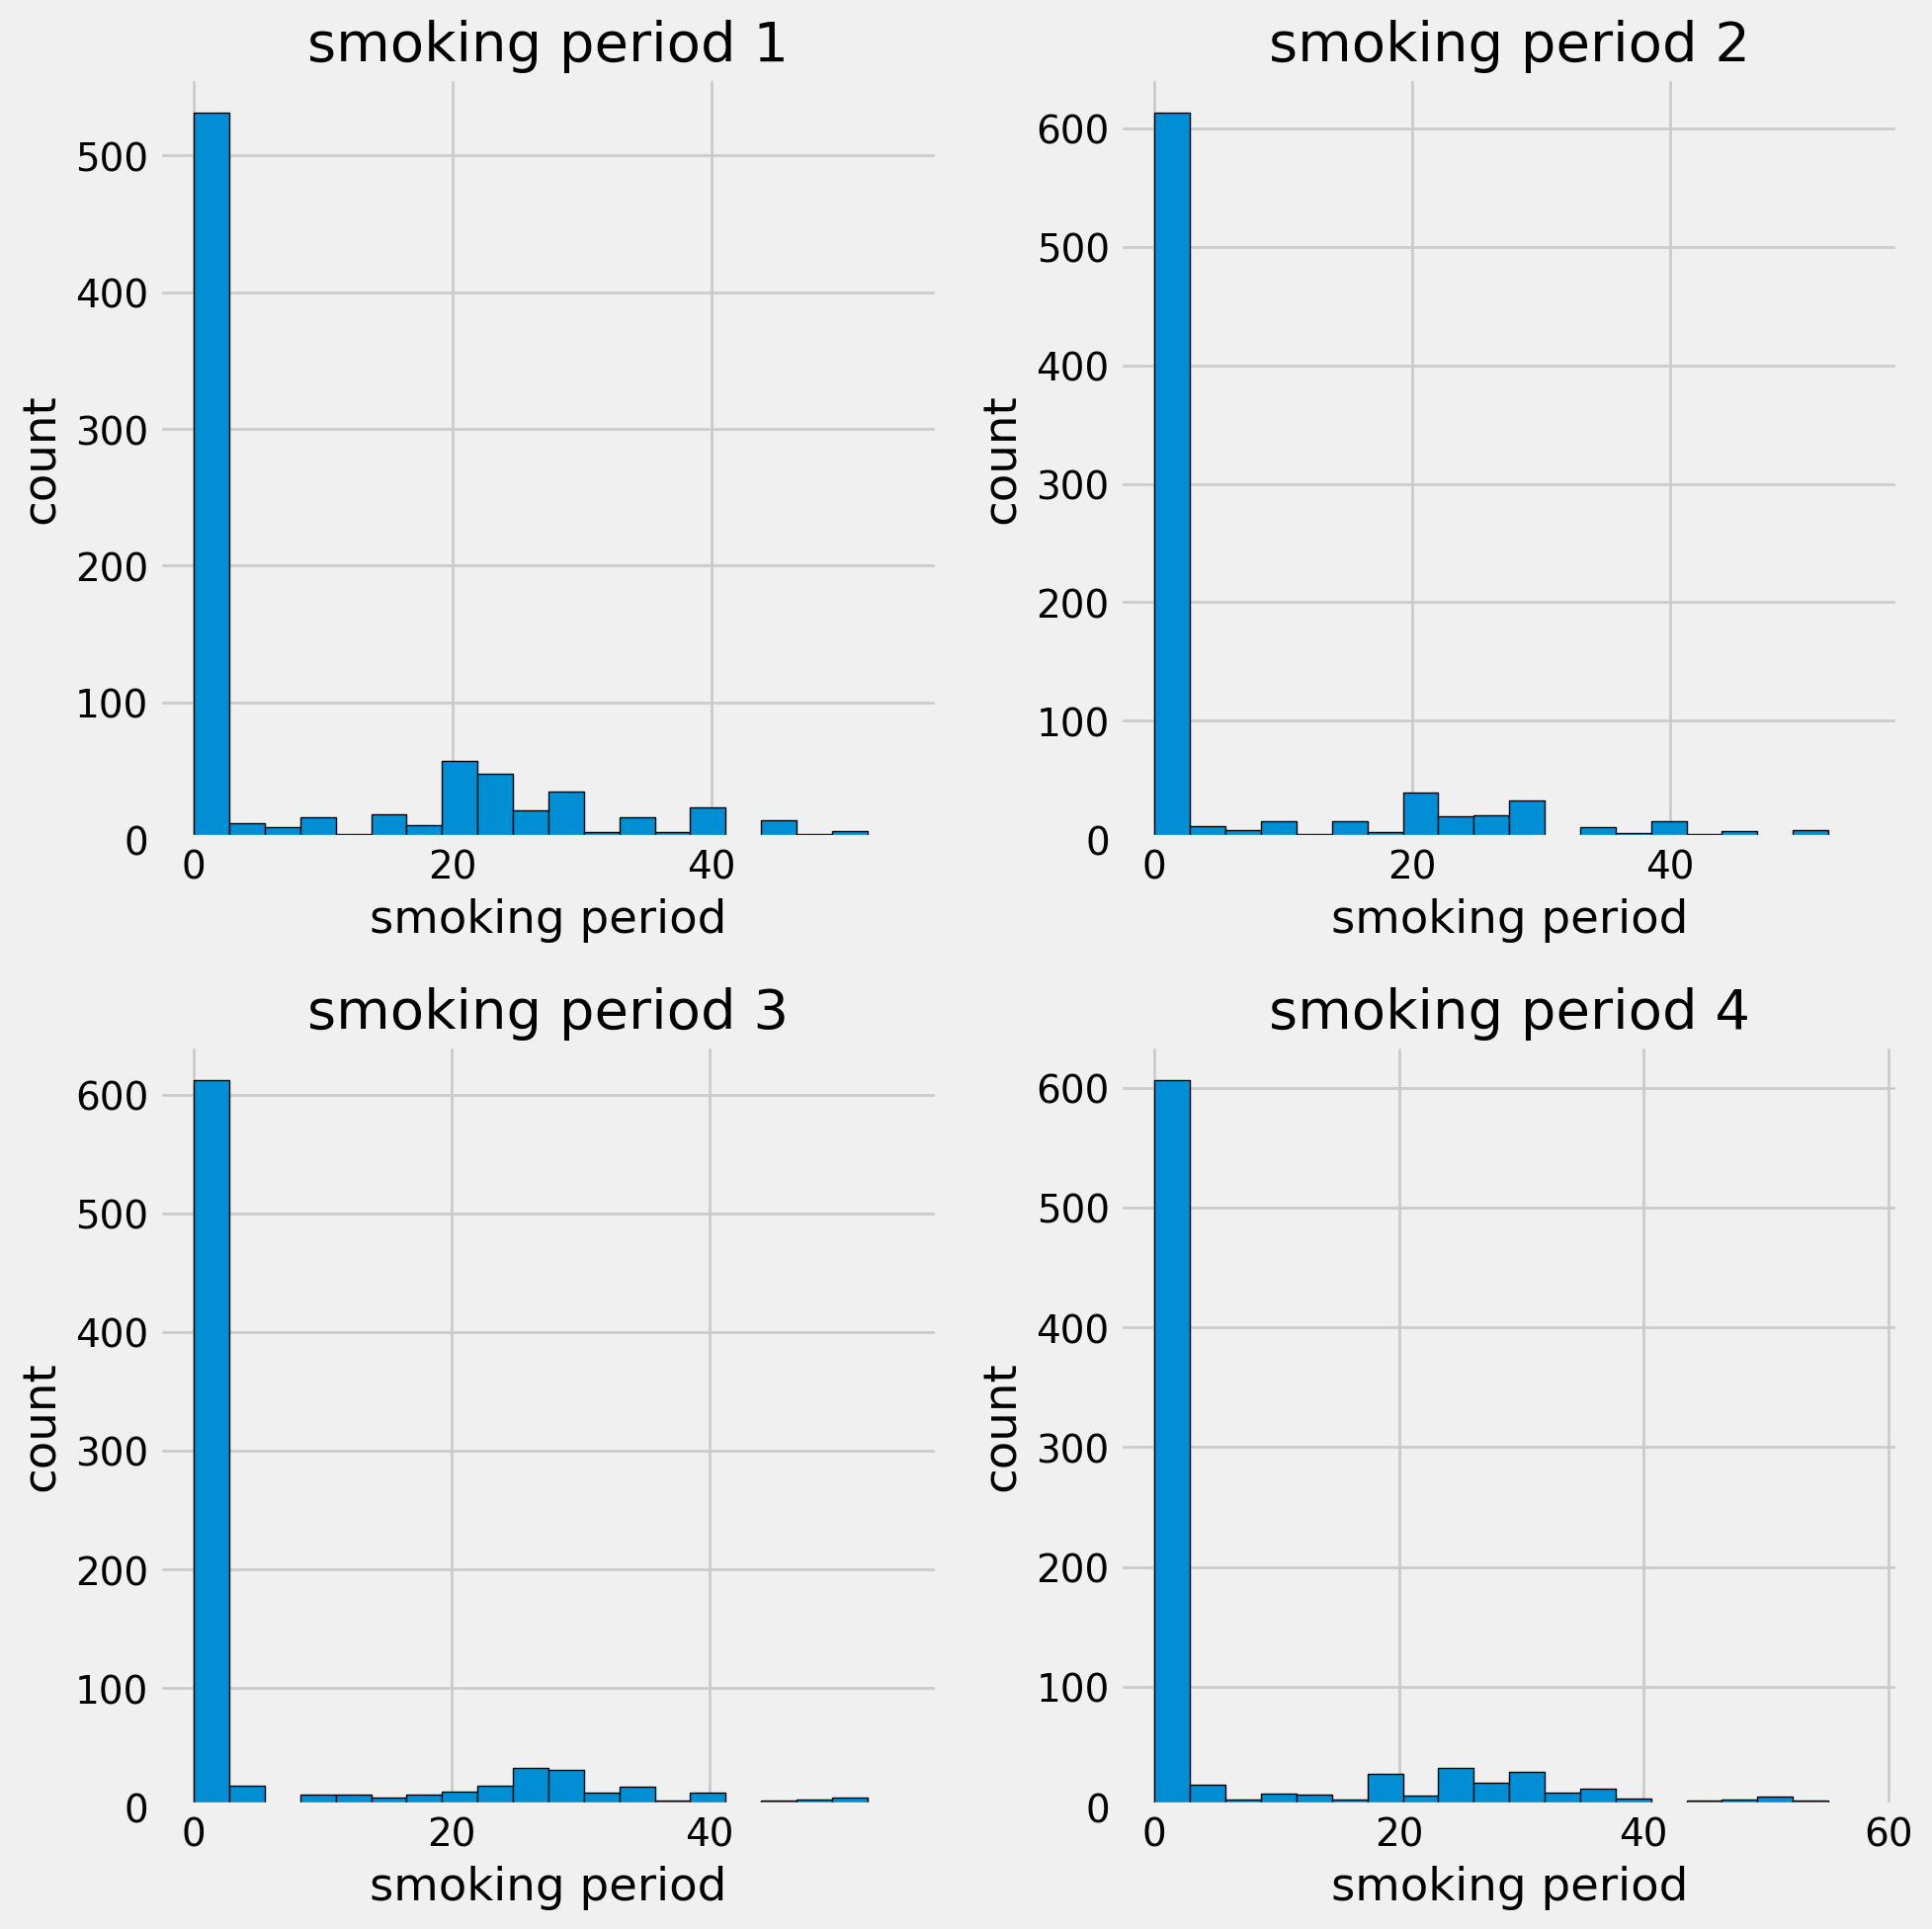

In [210]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# '하루 흡연량' 컬럼으로 히스토그램 그리기
axes[0,0].hist(df2['총_흡연_기간_1차'], bins=20, edgecolor='black')
axes[0,0].set_title('smoking period 1')
axes[0,0].set_xlabel('smoking period')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df2['총_흡연_기간_2차'], bins=20, edgecolor='black')
axes[0,1].set_title('smoking period 2')
axes[0,1].set_xlabel('smoking period')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df2['총_흡연_기간_3차'], bins=20, edgecolor='black')
axes[1,0].set_title('smoking period 3')
axes[1,0].set_xlabel('smoking period')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df2['총_흡연_기간_4차'], bins=20, edgecolor='black')
axes[1,1].set_title('smoking period 4')
axes[1,1].set_xlabel('smoking period')
axes[1,1].set_ylabel('count')


# 그래프들 사이 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

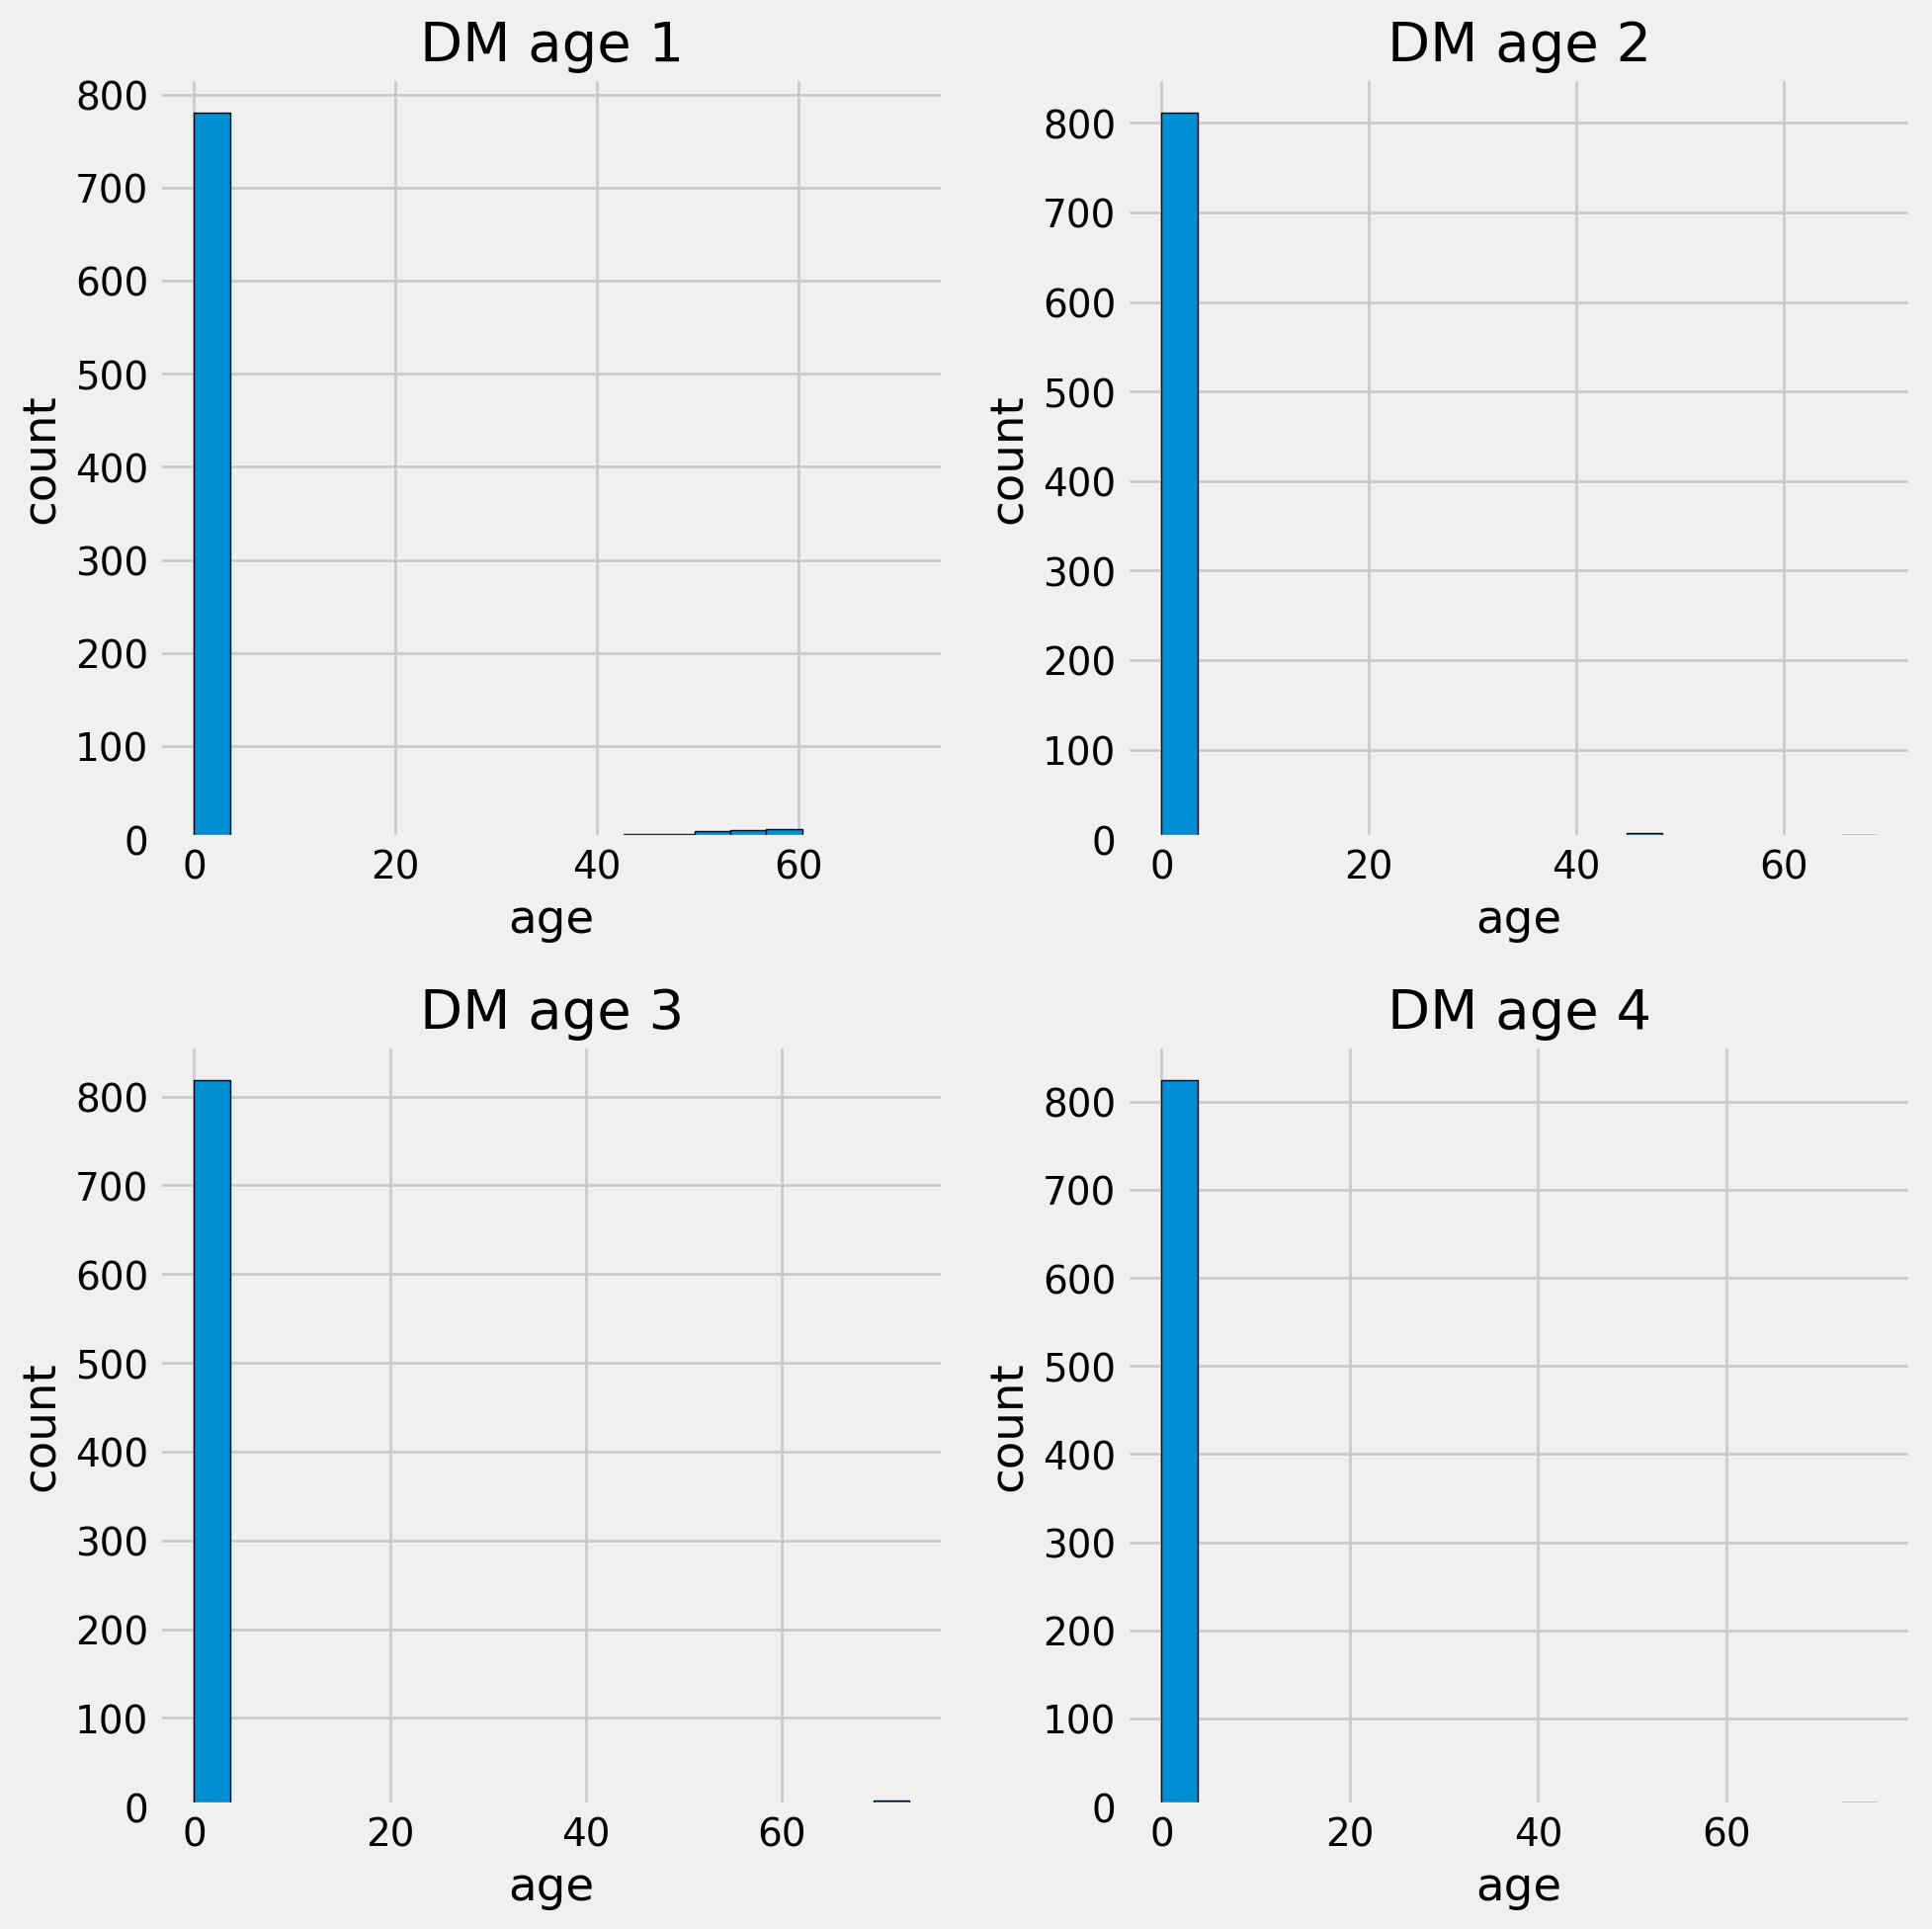

In [211]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# '하루 흡연량' 컬럼으로 히스토그램 그리기
axes[0,0].hist(df2['당뇨_진단_나이_1차'], bins=20, edgecolor='black')
axes[0,0].set_title('DM age 1')
axes[0,0].set_xlabel('age')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df2['당뇨_진단_나이_2차'], bins=20, edgecolor='black')
axes[0,1].set_title('DM age 2')
axes[0,1].set_xlabel('age')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df2['당뇨_진단_나이_3차'], bins=20, edgecolor='black')
axes[1,0].set_title('DM age 3')
axes[1,0].set_xlabel('age')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df2['당뇨_진단_나이_4차'], bins=20, edgecolor='black')
axes[1,1].set_title('DM age 4')
axes[1,1].set_xlabel('age')
axes[1,1].set_ylabel('count')


# 그래프들 사이 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

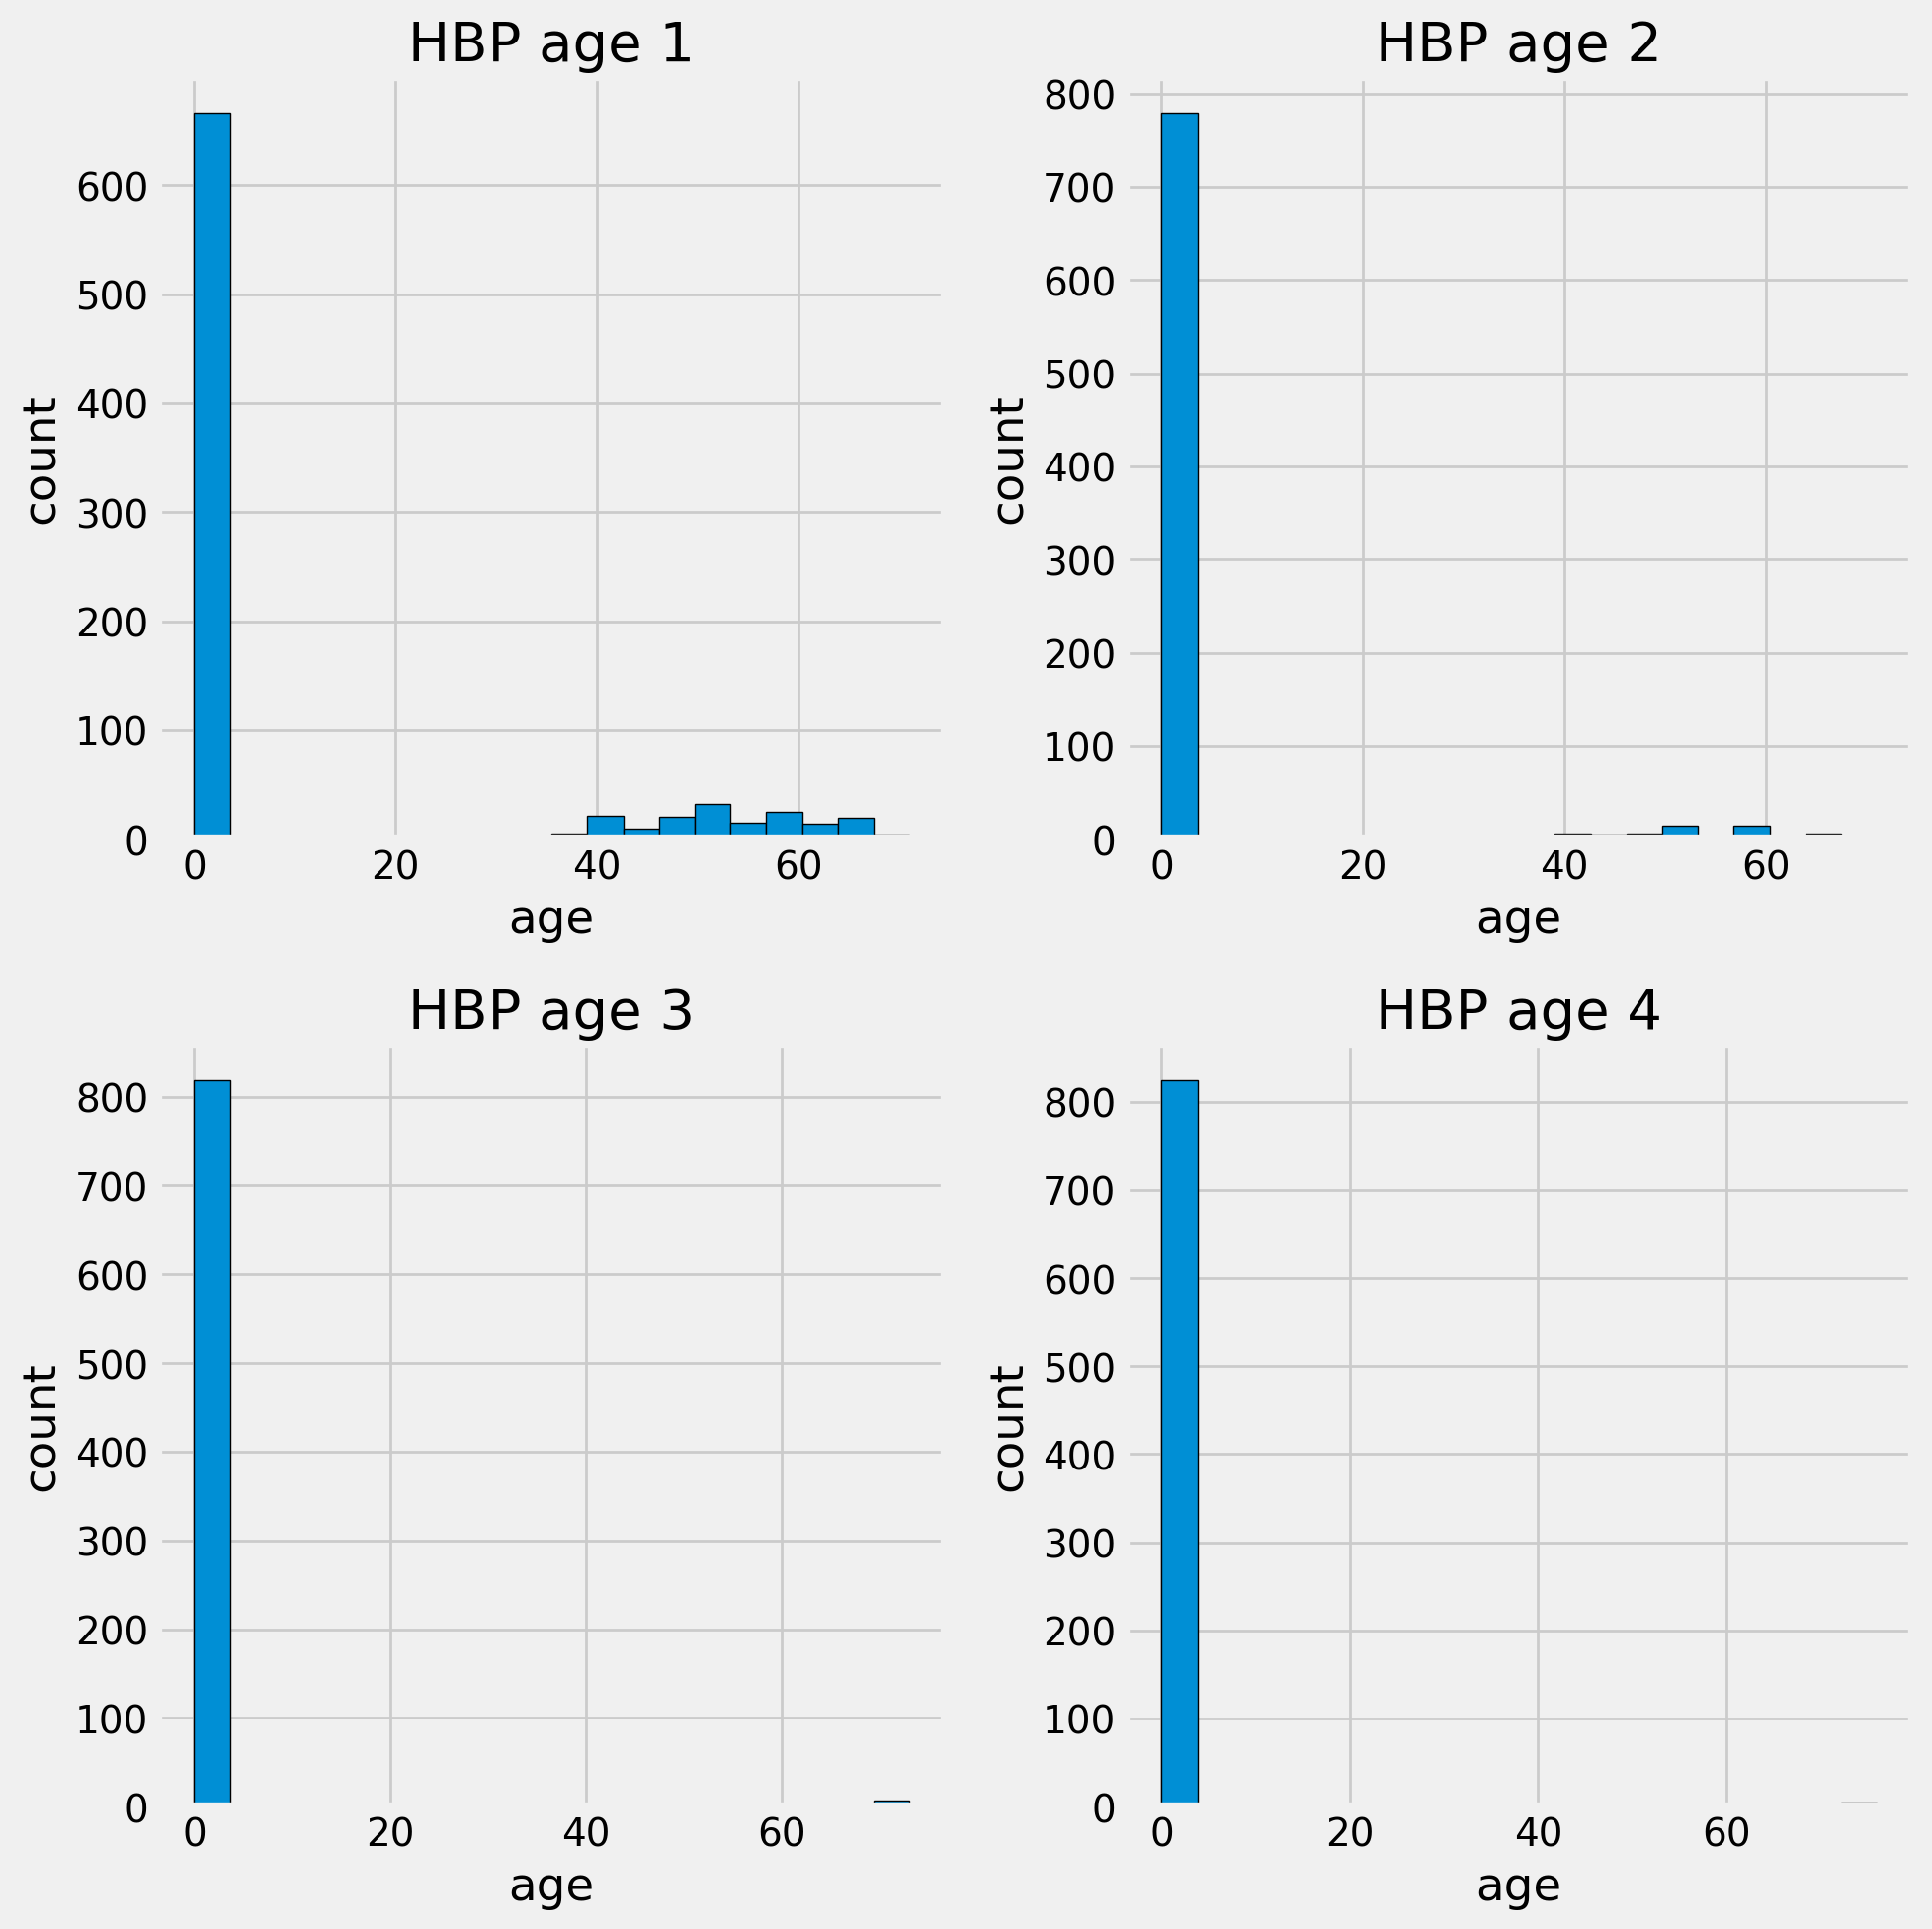

In [212]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# '하루 흡연량' 컬럼으로 히스토그램 그리기
axes[0,0].hist(df2['고혈압_진단_나이_1차'], bins=20, edgecolor='black')
axes[0,0].set_title('HBP age 1')
axes[0,0].set_xlabel('age')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df2['고혈압_진단_나이_2차'], bins=20, edgecolor='black')
axes[0,1].set_title('HBP age 2')
axes[0,1].set_xlabel('age')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df2['당뇨_진단_나이_3차'], bins=20, edgecolor='black')
axes[1,0].set_title('HBP age 3')
axes[1,0].set_xlabel('age')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df2['당뇨_진단_나이_4차'], bins=20, edgecolor='black')
axes[1,1].set_title('HBP age 4')
axes[1,1].set_xlabel('age')
axes[1,1].set_ylabel('count')


# 그래프들 사이 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

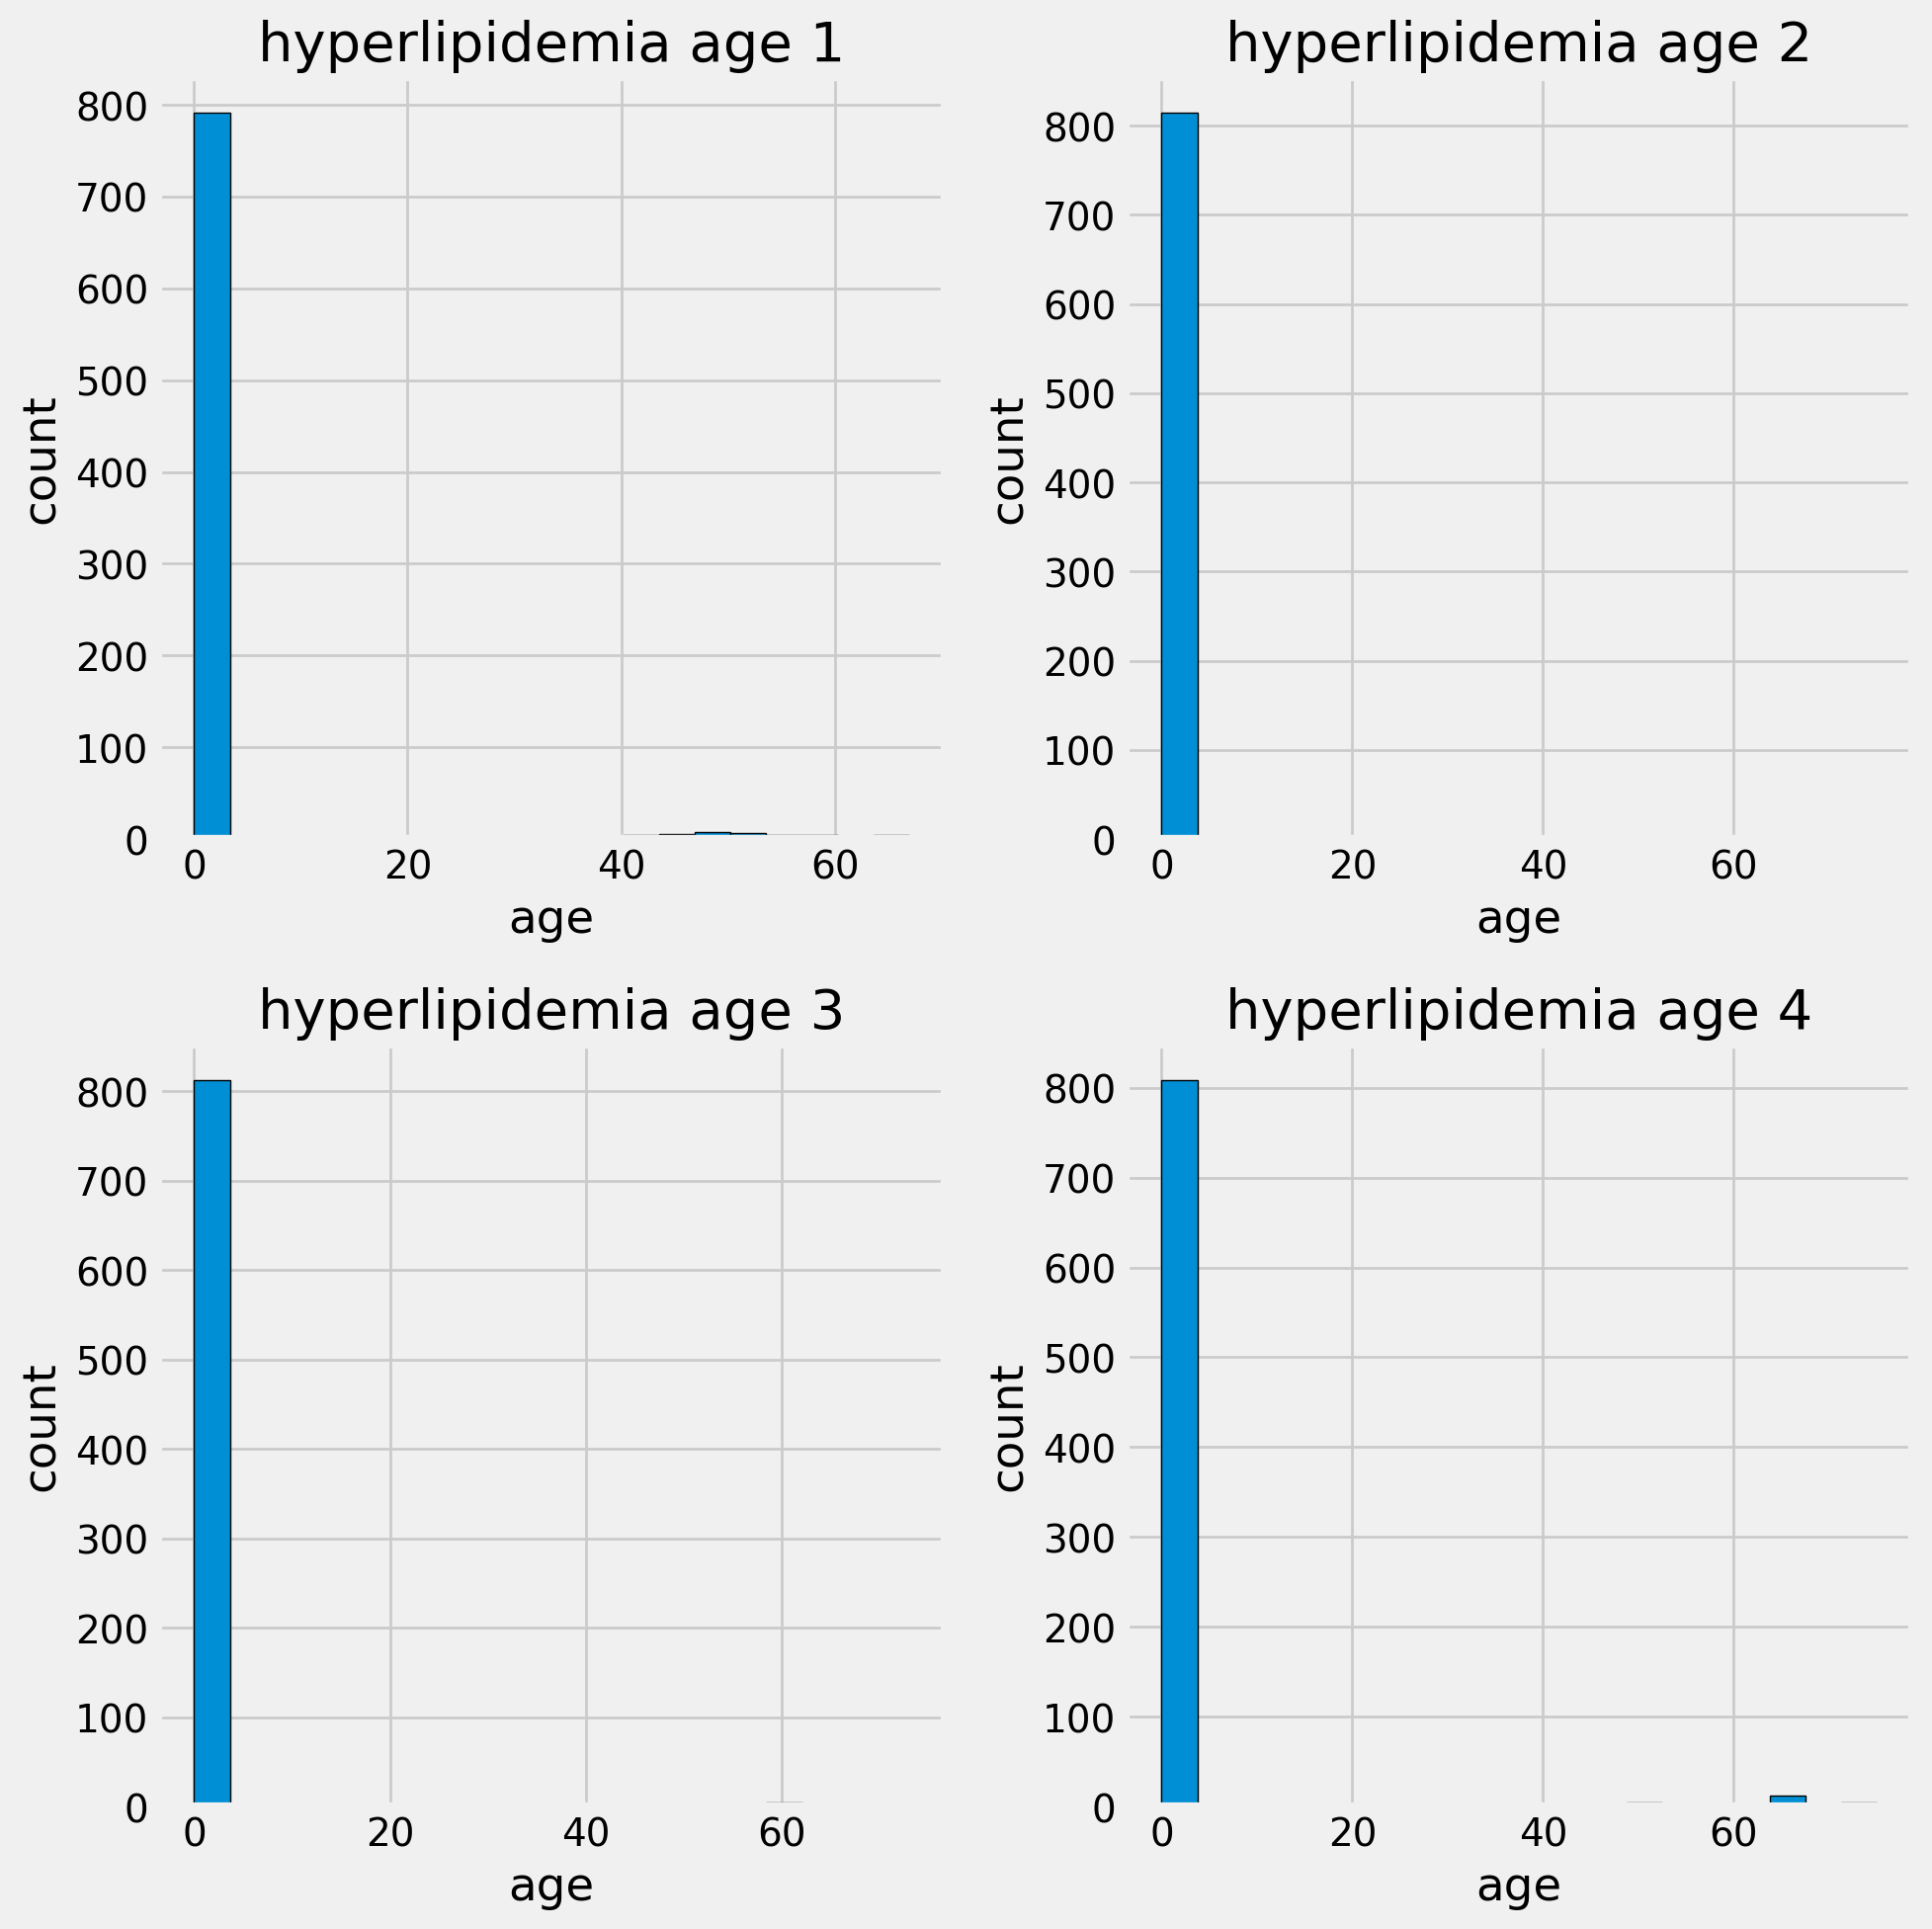

In [213]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# '하루 흡연량' 컬럼으로 히스토그램 그리기
axes[0,0].hist(df2['고지혈증_진단_나이_1차'], bins=20, edgecolor='black')
axes[0,0].set_title('hyperlipidemia age 1')
axes[0,0].set_xlabel('age')
axes[0,0].set_ylabel('count')

axes[0,1].hist(df2['고지혈증_진단_나이_2차'], bins=20, edgecolor='black')
axes[0,1].set_title('hyperlipidemia age 2')
axes[0,1].set_xlabel('age')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df2['고지혈증_진단_나이_3차'], bins=20, edgecolor='black')
axes[1,0].set_title('hyperlipidemia age 3')
axes[1,0].set_xlabel('age')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df2['고지혈증_진단_나이_4차'], bins=20, edgecolor='black')
axes[1,1].set_title('hyperlipidemia age 4')
axes[1,1].set_xlabel('age')
axes[1,1].set_ylabel('count')


# 그래프들 사이 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

이상치 제거 X

#로지스틱 회귀분석 (흡연기간, 당뇨여부)

In [214]:
import pandas as pd
import statsmodels.api as sm

# 데이터 준비 (예시 데이터프레임 df2 사용)
# x: 연속형 변수 (흡연 기간), y: 범주형 변수 (당뇨 진단 여부)
x = df2[['총_흡연_기간_1차','총_흡연_기간_2차','총_흡연_기간_3차','총_흡연_기간_4차']]
y = df2[['당뇨_1차','당뇨_2차','당뇨_3차','당뇨_4차']]

# 1차 데이터 사용
X_1차 = x['총_흡연_기간_1차']
y_1차 = y['당뇨_1차']

# Check the unique values of y_1차 to identify potential issues
print(y_1차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_1차 = y_1차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_1차 = sm.add_constant(X_1차)

# 로지스틱 회귀 모델 적합
model_1차 = sm.Logit(y_1차, X_1차)
result_1차 = model_1차.fit()

# 결과 출력
print(result_1차.summary())

[1 2]
Optimization terminated successfully.
         Current function value: 0.248035
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  당뇨_1차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.002663
Time:                        10:50:26   Log-Likelihood:                -207.61
converged:                       True   LL-Null:                       -208.16
Covariance Type:            nonrobust   LLR p-value:                    0.2923
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7166      0.171     15.908      0.000       2.382       3.051
총_흡연_기간_1차    -0.0099  

In [215]:
# 2차 데이터 사용
X_2차 = x['총_흡연_기간_2차']
y_2차 = y['당뇨_2차']

# Check the unique values of y_1차 to identify potential issues
print(y_2차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_2차 = y_2차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_2차 = sm.add_constant(X_2차)

# 로지스틱 회귀 모델 적합
model_2차 = sm.Logit(y_2차, X_2차)
result_2차 = model_2차.fit()

# 결과 출력
print(result_2차.summary())

[1 2]
Optimization terminated successfully.
         Current function value: 0.137861
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  당뇨_2차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.03259
Time:                        10:50:26   Log-Likelihood:                -115.39
converged:                       True   LL-Null:                       -119.28
Covariance Type:            nonrobust   LLR p-value:                  0.005297
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7517      0.254     14.751      0.000       3.253       4.250
총_흡연_기간_2차    -0.0354  

In [216]:
# 3차 데이터 사용
X_3차 = x['총_흡연_기간_3차']
y_3차 = y['당뇨_3차']

# Check the unique values of y_3차 to identify potential issues
print(y_3차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_3차 = y_3차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_3차 = sm.add_constant(X_3차)

# 로지스틱 회귀 모델 적합
model_3차 = sm.Logit(y_3차, X_3차)
result_3차 = model_3차.fit()

# 결과 출력
print(result_3차.summary())

[1 2]
Optimization terminated successfully.
         Current function value: 0.111245
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  당뇨_3차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.01407
Time:                        10:50:26   Log-Likelihood:                -93.112
converged:                       True   LL-Null:                       -94.441
Covariance Type:            nonrobust   LLR p-value:                    0.1030
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5363      0.240     14.752      0.000       3.066       4.006
총_흡연_기간_3차     0.0371  

In [217]:
# 4차 데이터 사용
X_4차 = x['총_흡연_기간_4차']
y_4차 = y['당뇨_4차']

# Check the unique values of y_4차 to identify potential issues
print(y_4차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_4차 = y_4차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_4차 = sm.add_constant(X_4차)

# 로지스틱 회귀 모델 적합
model_4차 = sm.Logit(y_4차, X_4차)
result_4차 = model_4차.fit()

# 결과 출력
print(result_4차.summary())

[1. 2.]
Optimization terminated successfully.
         Current function value: 0.084280
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  당뇨_4차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.008583
Time:                        10:50:26   Log-Likelihood:                -70.542
converged:                       True   LL-Null:                       -71.153
Covariance Type:            nonrobust   LLR p-value:                    0.2691
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9295      0.289     13.603      0.000       3.363       4.496
총_흡연_기간_4차     0.0275

흡연기간과 당뇨여부에는 의미있는 관련이 없다

# 로지스틱 회귀분석 (고혈압)

In [218]:
# 데이터 준비 (예시 데이터프레임 df2 사용)
# x: 연속형 변수 (흡연 기간), y: 범주형 변수 (고혈압 진단 여부)
x = df2[['총_흡연_기간_1차','총_흡연_기간_2차','총_흡연_기간_3차','총_흡연_기간_4차']]
y = df2[['고혈압_1차','고혈압_2차','고혈압_3차','고혈압_4차']]

# 1차 데이터 사용
X_1차 = x['총_흡연_기간_1차']
y_1차 = y['고혈압_1차']

# Check the unique values of y_1차 to identify potential issues
print(y_1차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_1차 = y_1차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_1차 = sm.add_constant(X_1차)

# 로지스틱 회귀 모델 적합
model_1차 = sm.Logit(y_1차, X_1차)
result_1차 = model_1차.fit()

# 결과 출력
print(result_1차.summary())


[1 2]
Optimization terminated successfully.
         Current function value: 0.502283
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 고혈압_1차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.007948
Time:                        10:50:26   Log-Likelihood:                -420.41
converged:                       True   LL-Null:                       -423.78
Covariance Type:            nonrobust   LLR p-value:                  0.009445
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2177      0.100     12.208      0.000       1.022       1.413
총_흡연_기간_1차     0.0171  

In [219]:
# 2차 데이터 사용
X_2차 = x['총_흡연_기간_2차']
y_2차 = y['고혈압_2차']

# Check the unique values of y_2차 to identify potential issues
print(y_2차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_2차 = y_2차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_2차 = sm.add_constant(X_2차)

# 로지스틱 회귀 모델 적합
model_2차 = sm.Logit(y_2차, X_2차)
result_2차 = model_2차.fit()

# 결과 출력
print(result_2차.summary())

[2 1]
Optimization terminated successfully.
         Current function value: 0.249778
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 고혈압_2차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.008075
Time:                        10:50:26   Log-Likelihood:                -209.06
converged:                       True   LL-Null:                       -210.77
Covariance Type:            nonrobust   LLR p-value:                   0.06505
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7428      0.163     16.859      0.000       2.424       3.062
총_흡연_기간_2차    -0.0181  

In [220]:
# 3차 데이터 사용
X_3차 = x['총_흡연_기간_3차']
y_3차 = y['고혈압_3차']

# Check the unique values of y_3차 to identify potential issues
print(y_3차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_3차 = y_3차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_3차 = sm.add_constant(X_3차)

# 로지스틱 회귀 모델 적합
model_3차 = sm.Logit(y_3차, X_3차)
result_3차 = model_3차.fit()

# 결과 출력
print(result_3차.summary())

[1 2]
Optimization terminated successfully.
         Current function value: 0.235471
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 고혈압_3차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.002284
Time:                        10:50:26   Log-Likelihood:                -197.09
converged:                       True   LL-Null:                       -197.54
Covariance Type:            nonrobust   LLR p-value:                    0.3421
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7692      0.165     16.742      0.000       2.445       3.093
총_흡연_기간_3차    -0.0096  

In [221]:
# 4차 데이터 사용
X_4차 = x['총_흡연_기간_4차']
y_4차 = y['고혈압_4차']

# Check the unique values of y_4차 to identify potential issues
print(y_4차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_4차 = y_4차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_4차 = sm.add_constant(X_4차)

# 로지스틱 회귀 모델 적합
model_4차 = sm.Logit(y_4차, X_4차)
result_4차 = model_4차.fit()

# 결과 출력
print(result_4차.summary())

[1. 2.]
Optimization terminated successfully.
         Current function value: 0.157438
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 고혈압_4차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.006139
Time:                        10:50:26   Log-Likelihood:                -131.78
converged:                       True   LL-Null:                       -132.59
Covariance Type:            nonrobust   LLR p-value:                    0.2020
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3933      0.219     15.506      0.000       2.964       3.822
총_흡연_기간_4차    -0.0156

고혈압도 관련 X

로지스틱 (고지혈증)

In [222]:
# 데이터 준비 (예시 데이터프레임 df2 사용)
# x: 연속형 변수 (흡연 기간), y: 범주형 변수 (고지혈증 진단 여부)
x = df2[['총_흡연_기간_1차','총_흡연_기간_2차','총_흡연_기간_3차','총_흡연_기간_4차']]
y = df2[['고지혈증_1차','고지혈증_2차','고지혈증_3차','고지혈증_4차']]

# 1차 데이터 사용
X_1차 = x['총_흡연_기간_1차']
y_1차 = y['고지혈증_1차']

# Check the unique values of y_1차 to identify potential issues
print(y_1차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_1차 = y_1차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_1차 = sm.add_constant(X_1차)

# 로지스틱 회귀 모델 적합
model_1차 = sm.Logit(y_1차, X_1차)
result_1차 = model_1차.fit()

# 결과 출력
print(result_1차.summary())

[1 2]
Optimization terminated successfully.
         Current function value: 0.219467
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                고지혈증_1차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:               0.0006364
Time:                        10:50:27   Log-Likelihood:                -183.69
converged:                       True   LL-Null:                       -183.81
Covariance Type:            nonrobust   LLR p-value:                    0.6286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7527      0.176     15.675      0.000       2.409       3.097
총_흡연_기간_1차     0.0053  

In [223]:
# 2차 데이터 사용
X_2차 = x['총_흡연_기간_2차']
y_2차 = y['고지혈증_2차']

# Check the unique values of y_2차 to identify potential issues
print(y_2차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_2차 = y_2차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_2차 = sm.add_constant(X_2차)

# 로지스틱 회귀 모델 적합
model_2차 = sm.Logit(y_2차, X_2차)
result_2차 = model_2차.fit()

# 결과 출력
print(result_2차.summary())


[1 2]
Optimization terminated successfully.
         Current function value: 0.123276
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                고지혈증_2차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.02058
Time:                        10:50:27   Log-Likelihood:                -103.18
converged:                       True   LL-Null:                       -105.35
Covariance Type:            nonrobust   LLR p-value:                   0.03729
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3603      0.222     15.106      0.000       2.924       3.796
총_흡연_기간_2차     0.0514  

In [224]:
# 3차 데이터 사용
X_3차 = x['총_흡연_기간_3차']
y_3차 = y['고지혈증_3차']

# Check the unique values of y_3차 to identify potential issues
print(y_3차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_3차 = y_3차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_3차 = sm.add_constant(X_3차)

# 로지스틱 회귀 모델 적합
model_3차 = sm.Logit(y_3차, X_3차)
result_3차 = model_3차.fit()

# 결과 출력
print(result_3차.summary())

[1 2]
Optimization terminated successfully.
         Current function value: 0.142139
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                고지혈증_3차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.002578
Time:                        10:50:27   Log-Likelihood:                -118.97
converged:                       True   LL-Null:                       -119.28
Covariance Type:            nonrobust   LLR p-value:                    0.4329
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3234      0.215     15.446      0.000       2.902       3.745
총_흡연_기간_3차     0.0127  

In [225]:
# 4차 데이터 사용
X_4차 = x['총_흡연_기간_4차']
y_4차 = y['고지혈증_4차']

# Check the unique values of y_4차 to identify potential issues
print(y_4차.unique())

# If values other than 0 and 1 exist, convert them to 0 and 1
# For example, if the values are 1 and 2:
y_4차 = y_4차.replace(2, 0)  # Replace 2 with 0

# 상수항 추가 (로지스틱 회귀에 필요)
X_4차 = sm.add_constant(X_4차)

# 로지스틱 회귀 모델 적합
model_4차 = sm.Logit(y_4차, X_4차)
result_4차 = model_4차.fit()

# 결과 출력
print(result_4차.summary())

[1. 2.]
Optimization terminated successfully.
         Current function value: 0.149442
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                고지혈증_4차   No. Observations:                  837
Model:                          Logit   Df Residuals:                      835
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                0.007320
Time:                        10:50:27   Log-Likelihood:                -125.08
converged:                       True   LL-Null:                       -126.01
Covariance Type:            nonrobust   LLR p-value:                    0.1744
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2006      0.204     15.658      0.000       2.800       3.601
총_흡연_기간_4차     0.0227

시발

# correlation

In [226]:
x = df2[['총_흡연_기간_1차','총_흡연_기간_2차','총_흡연_기간_3차','총_흡연_기간_4차']]
y = df2[['고혈압_1차','고혈압_2차','고혈압_3차','고혈압_4차']]

# Calculate the correlation matrix
correlation_matrix = x.corrwith(y)

# Print the correlation matrix
print(correlation_matrix)

고혈압_1차       NaN
고혈압_2차       NaN
고혈압_3차       NaN
고혈압_4차       NaN
총_흡연_기간_1차   NaN
총_흡연_기간_2차   NaN
총_흡연_기간_3차   NaN
총_흡연_기간_4차   NaN
dtype: float64


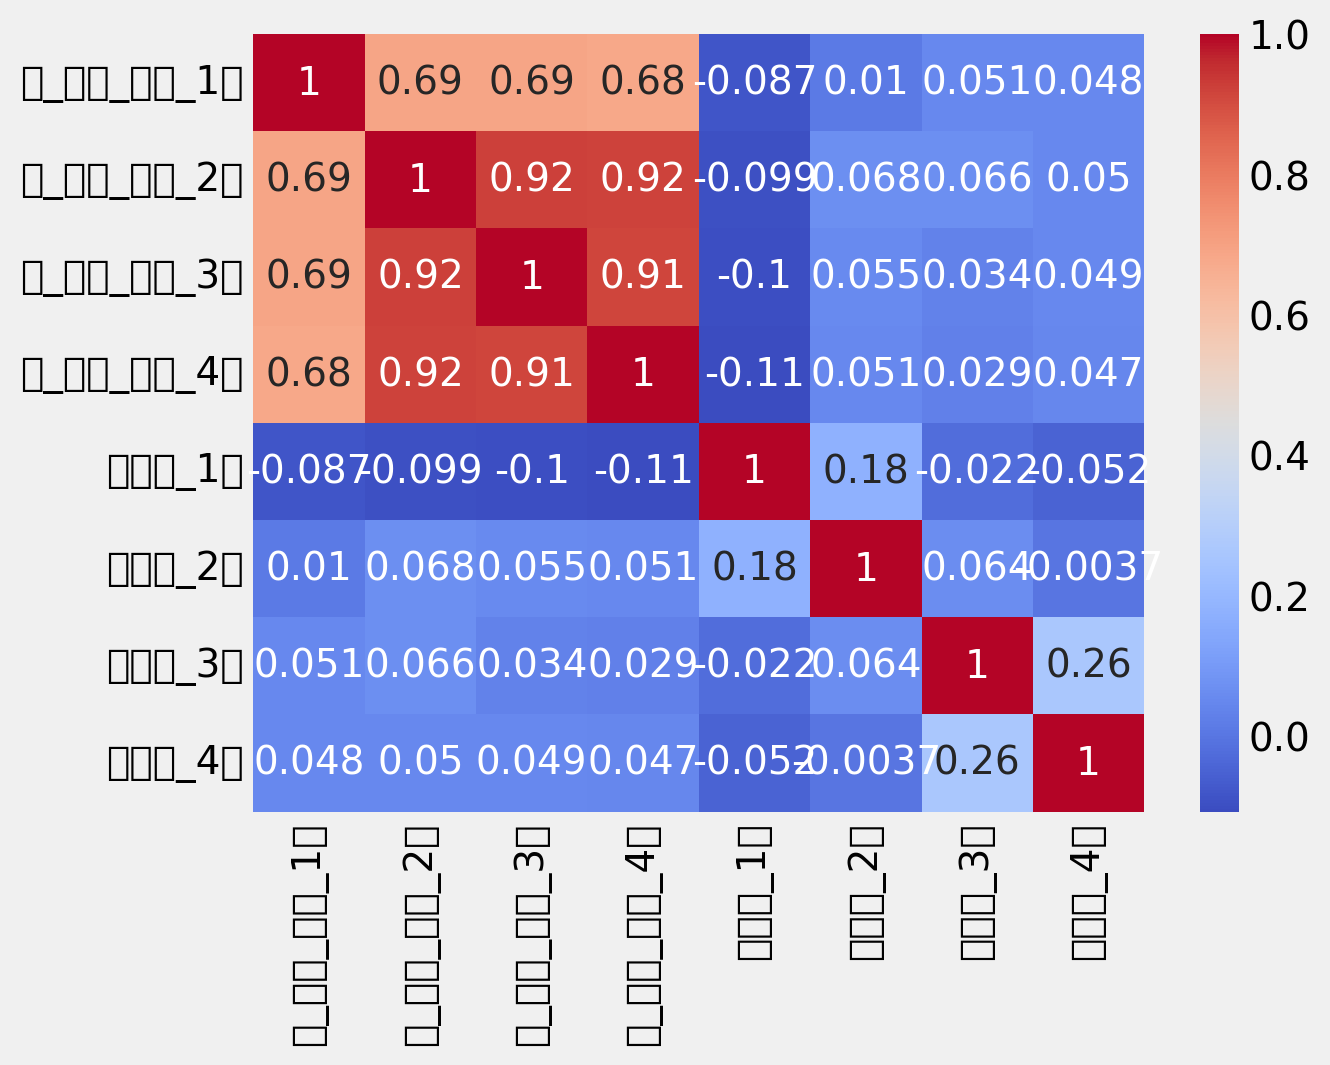

In [227]:
# x와 y 데이터프레임을 합쳐서 하나의 데이터프레임으로 만듭니다.
xy = pd.concat([x, y], axis=1)

# 합쳐진 데이터프레임에서 상관계수 행렬을 계산합니다.
correlation_matrix = xy.corr()

#  히트맵으로 시각화합니다.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()